<a href="https://colab.research.google.com/github/kiraaa66/algGNEP/blob/main/draft5Evol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Such

In [ ]:
import numpy as np
from scipy.optimize import minimize
#!python -m pip install -U pandas
import pandas as pd
import itertools
import jax.numpy as jnp
from jax import random as jrandom
from jax import nn as jnn
from jax import jit
import numpy as np
import random
import math
import time
import sys
import jax
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint
from scipy import stats
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
#https://gemfury.com/stream/python:scipy/-/content/optimize/slsqp.py
from numpy import arange
from matplotlib import pyplot
from scipy.optimize import minimize_scalar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Optimization Functions and Constraints

In [ ]:
#https://docs.scipy.org/doc/scipy/tutorial/optimize.html
#https://towardsdatascience.com/optimization-with-scipy-and-application-ideas-to-machine-learning-81d39c7938b8
#https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html#optimize-minimize-slsqp
#http://apmonitor.com/che263/index.php/Main/PythonOptimization
#https://stackoverflow.com/questions/26882087/python-scipy-optimization-minimize-using-slsqp-showing-maximized-results
#https://aleksandarhaber.com/solve-constrained-optimization-problems-in-python-by-using-scipy-library-and-minimize-function/
#https://aleksandarhaber.com/solve-optimization-problems-in-python-by-using-scipy-library/

#https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.optimize.minimize.html
#https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_non_bounds_constraints.html

In [ ]:


#result = minimize(func1, 0.5, method='SLSQP', bounds = (0.0,1.0))
#print(result.x[0])
#https://docs.python.org/3/library/math.html
#http://hplgit.github.io/primer.html/doc/pub/funcif/._funcif-solarized001.html#:~:text=All%20Python%20functions%20begin%20with,the%20function%20must%20be%20indented.


In [ ]:
def func1(x):
  return (x-1)**2

def func2(x):
  return (x-0.5)**2

#ineq_cons = {'type': 'ineq', 'fun' : lambda x : x[0] + x[1] - 1}

# Fitness Evaluation

In [ ]:
def pen(a,b):

  p1 = float(1.0 - a)
  p2 = float(1.0 - b)

  bound1 = [(0.0,1.0-b)]
  bound2 = [(0.0,1.0-a)]
 # lin_con1 = LinearConstraint(1,0.0,1.0-b)
 # print(lin_con1)
 # lin_con2 = LinearConstraint(1,0.0,1.0-a)

  result1 = minimize(func1, x0=0.0, method='SLSQP', bounds = bound1, options={'maxiter':5})
  result2 = minimize(func2, x0=0.0, method='SLSQP', bounds = bound2, options={'maxiter':5})

  shadowX = result1.x
  shadowY = result2.x

  penalty = math.sqrt((math.pow(a-shadowX,2))+(math.pow(b-shadowY,2)))
  #pen =  math.sqrt((math.pow(x - shadowX, 2))+(math.pow(y-shadowY,2)))
  #print(penalty)
  return penalty

# Replacement Function

In [ ]:
def minSearch(xMin):
  return xMin - (xMin - 0)*(math.pow(0.99,k))
def maxSearch(xMax):
  return xMax + (1 - xMax)*(math.pow(0.99,k))
def maxYSearch(yMax):
  return yMax + (1 - yMax)*(math.pow(0.99,k))

# Linear Regression Functions

In [ ]:
#https://www.w3schools.com/python/python_ml_linear_regression.asp
#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
#https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

def regressLine(xVal, m, yInt): #returns the y value of any x coordinate on the line
  return m * xVal + yInt

linReg = LinearRegression()

# Randomize Function

In [ ]:
def randomY(maxY, minY):
  return random.uniform(minY, maxY)

# Declaring All Arrays

In [ ]:
#https://www.studytonight.com/python-howtos/how-to-declare-an-array-in-python
#https://linuxhint.com/numpy-create-2d-array/
#https://www.pluralsight.com/guides/different-ways-create-numpy-arrays
setXYP = np.zeros(3000)
setXYP = setXYP.reshape(1000,3)

setX = np.empty(1000, dtype=object)
setY = np.empty(1000, dtype=object)
penPts = np.zeros(1000, dtype=object)
ptNumbers = np.zeros(1000, dtype=object)
penSelection = np.empty(300, dtype=object)
penNo = np.empty(700, dtype=object)
newX = np.empty(300, dtype=float).reshape(-1,1)
newY = np.empty(300, dtype=float)
yReg = np.empty(700, dtype=float)
minY = np.empty(700, dtype=float)
maxY = np.empty(700, dtype=float)
#m = np.empty(1000, dtype=object)
#yInt = np.empty(1000, dtype=object)


# Runthrough of Code

1 f(x) =  [-0.76395954] *x + 0.8482469215917692
2 f(x) =  [-0.84842279] *x + 0.8882215947129617
3 f(x) =  [-0.89024297] *x + 0.9173748306649754
4 f(x) =  [-0.93008341] *x + 0.9463033894680623
5 f(x) =  [-0.96481287] *x + 0.9693250874995742
6 f(x) =  [-0.96892505] *x + 0.972069004451764
7 f(x) =  [-0.96487342] *x + 0.9709703556145691
8 f(x) =  [-0.97866072] *x + 0.9806140810402899
9 f(x) =  [-0.97588886] *x + 0.9794423501602247
10 f(x) =  [-0.98521766] *x + 0.9871583667373824


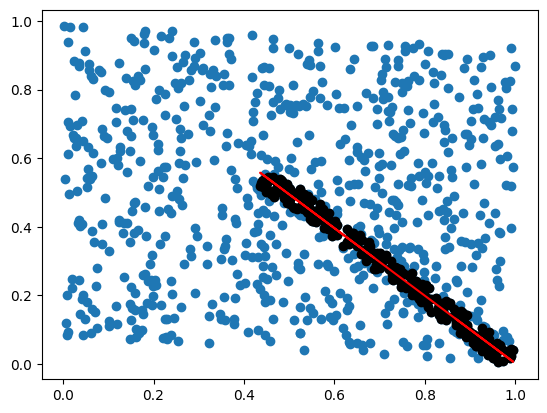

11 f(x) =  [-0.99162728] *x + 0.9921482050374286
12 f(x) =  [-1.00092736] *x + 0.9997337400064246
13 f(x) =  [-1.00272492] *x + 1.0006711749376784
14 f(x) =  [-1.00042664] *x + 0.9994653326435161
15 f(x) =  [-0.99521175] *x + 0.9957393085562873
16 f(x) =  [-0.99689188] *x + 0.9967668131089218
17 f(x) =  [-0.99337935] *x + 0.9941896466935126
18 f(x) =  [-0.99459439] *x + 0.9952587723723412
19 f(x) =  [-0.99685032] *x + 0.9969064271031638
20 f(x) =  [-0.99584698] *x + 0.9965611873564417


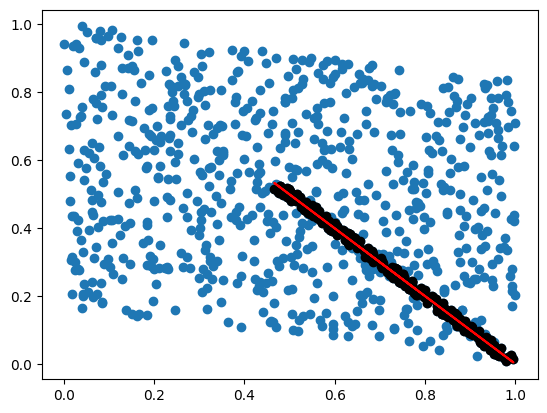

21 f(x) =  [-0.99641697] *x + 0.9968032375792684
22 f(x) =  [-0.99640726] *x + 0.996515328956101
23 f(x) =  [-0.99701496] *x + 0.9970639292792003
24 f(x) =  [-0.99645218] *x + 0.9965927775224432
25 f(x) =  [-0.99610424] *x + 0.9965198931921038
26 f(x) =  [-0.99561356] *x + 0.9960969091470044
27 f(x) =  [-0.99666786] *x + 0.9970381902197754
28 f(x) =  [-0.99679367] *x + 0.9973106704410066
29 f(x) =  [-0.99682071] *x + 0.9973024994601634
30 f(x) =  [-0.99855458] *x + 0.9988970384383422


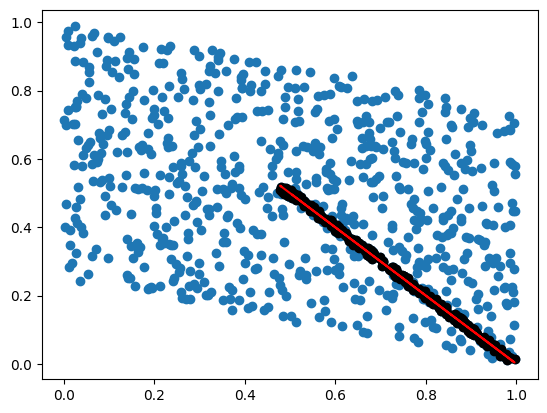

31 f(x) =  [-0.9979943] *x + 0.9985066177371567
32 f(x) =  [-0.99950572] *x + 0.999602610652907
33 f(x) =  [-1.00055139] *x + 1.0003159446987264
34 f(x) =  [-1.00031713] *x + 1.0001659818149622
35 f(x) =  [-0.99991183] *x + 0.9999179680563319
36 f(x) =  [-0.99966931] *x + 0.9997883993852669
37 f(x) =  [-0.99979574] *x + 0.9998307703181502
38 f(x) =  [-0.99888337] *x + 0.9991207856849771
39 f(x) =  [-0.99944729] *x + 0.9996586938822523
40 f(x) =  [-1.00054361] *x + 1.000552510751493


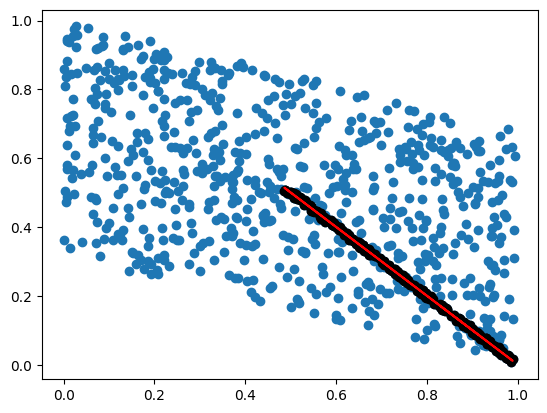

41 f(x) =  [-0.99986681] *x + 1.0001168490988404
42 f(x) =  [-0.99971128] *x + 1.000068214065814
43 f(x) =  [-0.99902058] *x + 0.9994778283161788
44 f(x) =  [-0.99905198] *x + 0.9994406148183181
45 f(x) =  [-0.99934838] *x + 0.9996610380648403
46 f(x) =  [-0.99864111] *x + 0.9992022057049037
47 f(x) =  [-0.99863751] *x + 0.99915454629223
48 f(x) =  [-0.99937529] *x + 0.9997702589487151
49 f(x) =  [-0.99973259] *x + 0.9999523683232598
50 f(x) =  [-0.9992383] *x + 0.9996066965471848


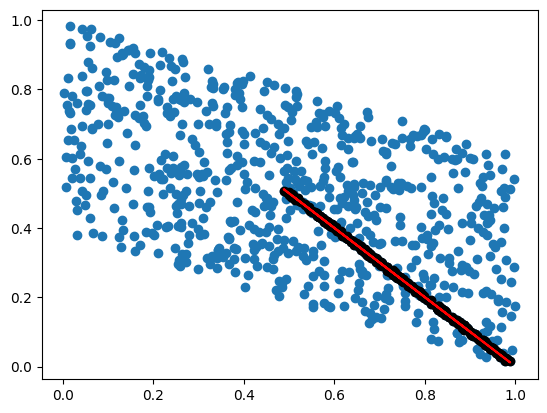

51 f(x) =  [-0.99907954] *x + 0.9994213082310881
52 f(x) =  [-0.99965623] *x + 0.9999167115710709
53 f(x) =  [-1.00011501] *x + 1.0003587347822362
54 f(x) =  [-1.00007051] *x + 1.0003371871002373
55 f(x) =  [-1.00020926] *x + 1.0004511446825337
56 f(x) =  [-1.00058413] *x + 1.000718224866577
57 f(x) =  [-1.00036928] *x + 1.0004848653163685
58 f(x) =  [-1.0004156] *x + 1.000472567326733
59 f(x) =  [-1.00059318] *x + 1.00063528802277
60 f(x) =  [-1.00035674] *x + 1.0004608479894805


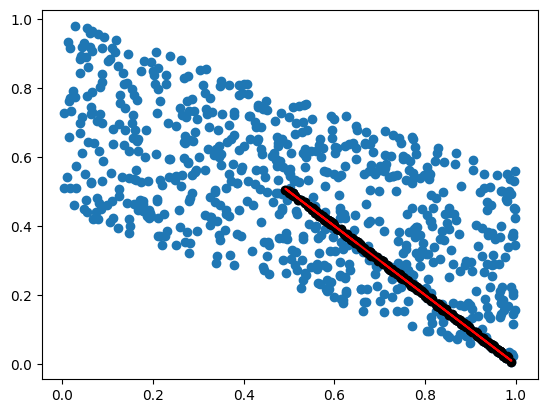

61 f(x) =  [-1.00023454] *x + 1.0003402707230402
62 f(x) =  [-0.99968312] *x + 0.9999851637581849
63 f(x) =  [-0.99853505] *x + 0.9991098641596188
64 f(x) =  [-0.99920383] *x + 0.9996525782458467
65 f(x) =  [-0.99922274] *x + 0.9996458343393354
66 f(x) =  [-0.99949788] *x + 0.999821252597421
67 f(x) =  [-0.99929323] *x + 0.9996679242401396
68 f(x) =  [-0.99927388] *x + 0.9996321032666724
69 f(x) =  [-0.99918909] *x + 0.999521265860988
70 f(x) =  [-0.99958902] *x + 0.9998470869261754


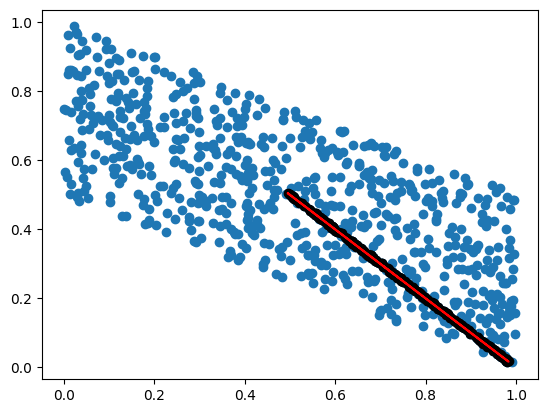

71 f(x) =  [-0.99973662] *x + 0.9998759946402256
72 f(x) =  [-0.99956864] *x + 0.9997685383566934
73 f(x) =  [-0.99942615] *x + 0.999716984420794
74 f(x) =  [-0.99941974] *x + 0.9997520701039626
75 f(x) =  [-0.99984534] *x + 1.0000119941078598
76 f(x) =  [-1.00019486] *x + 1.0002630180189325
77 f(x) =  [-1.00024504] *x + 1.000296071215953
78 f(x) =  [-1.00005327] *x + 1.0001961833251134
79 f(x) =  [-1.00005949] *x + 1.00018648907339
80 f(x) =  [-1.00027347] *x + 1.0003138513361192


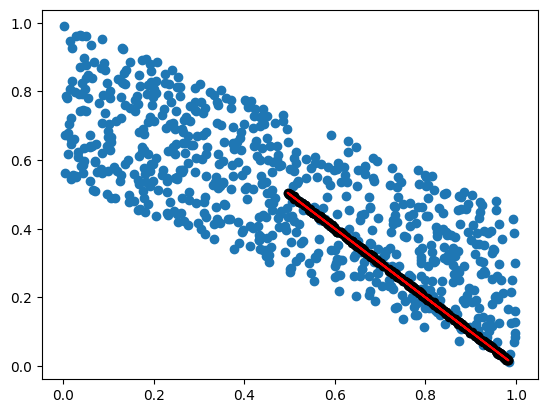

81 f(x) =  [-1.00024177] *x + 1.000311414667881
82 f(x) =  [-1.00058076] *x + 1.0005450732144887
83 f(x) =  [-1.00069939] *x + 1.0006290941696427
84 f(x) =  [-1.00060593] *x + 1.0005146254134476
85 f(x) =  [-1.00052405] *x + 1.0004464664514086
86 f(x) =  [-1.00056493] *x + 1.0004778191530646
87 f(x) =  [-1.00048935] *x + 1.0004040689575187
88 f(x) =  [-1.00006465] *x + 1.000019645755977
89 f(x) =  [-1.00010463] *x + 1.0000451222699334
90 f(x) =  [-1.00001226] *x + 1.0000023997273442


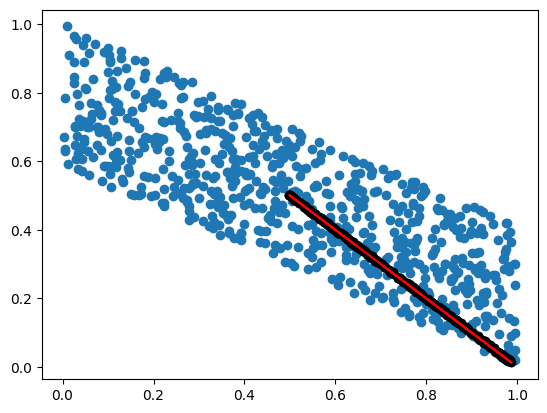

91 f(x) =  [-0.99997344] *x + 0.9999902016046012
92 f(x) =  [-0.99979592] *x + 0.9998599838760994
93 f(x) =  [-0.99987485] *x + 0.9999481542705458
94 f(x) =  [-1.00014646] *x + 1.0001856195650056
95 f(x) =  [-1.00016503] *x + 1.000160507293511
96 f(x) =  [-1.00009561] *x + 1.0001161259730014
97 f(x) =  [-1.00001294] *x + 1.0000447148020937
98 f(x) =  [-0.99966203] *x + 0.9997707254521284
99 f(x) =  [-0.99940532] *x + 0.9996038785637693
100 f(x) =  [-0.99947111] *x + 0.999635751354428


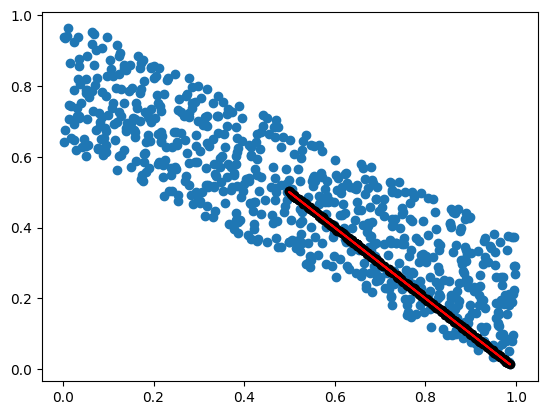

101 f(x) =  [-0.99927853] *x + 0.9994821914038523
102 f(x) =  [-0.99953922] *x + 0.9996595271555737
103 f(x) =  [-0.99959556] *x + 0.9997187978499933
104 f(x) =  [-0.99996139] *x + 0.999990439373365
105 f(x) =  [-1.00006986] *x + 1.0000572985041396
106 f(x) =  [-0.99995461] *x + 0.9999918345903311
107 f(x) =  [-1.00011048] *x + 1.0001144746663568
108 f(x) =  [-1.00025704] *x + 1.0002310430764532
109 f(x) =  [-1.00023768] *x + 1.0002247498485963
110 f(x) =  [-1.00023643] *x + 1.0002249834514636


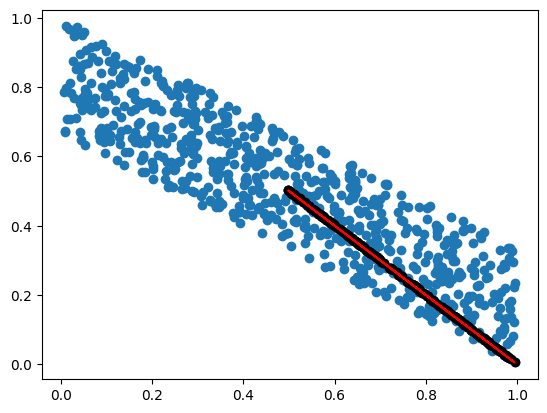

111 f(x) =  [-1.00004608] *x + 1.0000907476637684
112 f(x) =  [-1.00006874] *x + 1.0001182989178328
113 f(x) =  [-1.00001617] *x + 1.0000688178509702
114 f(x) =  [-0.99983044] *x + 0.9999304953059633
115 f(x) =  [-0.99981922] *x + 0.9999621121317226
116 f(x) =  [-0.99972793] *x + 0.999906989971761
117 f(x) =  [-0.99959349] *x + 0.999793799689926
118 f(x) =  [-0.99964162] *x + 0.9998240614921701
119 f(x) =  [-0.99970959] *x + 0.9998637996897536
120 f(x) =  [-0.99979674] *x + 0.9999036062478845


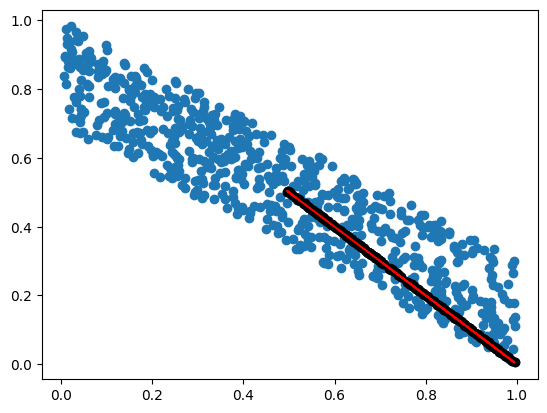

121 f(x) =  [-0.99992838] *x + 1.0000067635231777
122 f(x) =  [-1.00004713] *x + 1.0000967441706479
123 f(x) =  [-1.00000456] *x + 1.0000494320500133
124 f(x) =  [-0.99992769] *x + 1.0000013604915492
125 f(x) =  [-0.99998738] *x + 1.0000488415365
126 f(x) =  [-1.00006889] *x + 1.0001273024462989
127 f(x) =  [-1.00010032] *x + 1.0001332113279182
128 f(x) =  [-1.00012749] *x + 1.0001589044034471
129 f(x) =  [-0.99995871] *x + 1.0000621148196767
130 f(x) =  [-0.99976736] *x + 0.9999257437025013


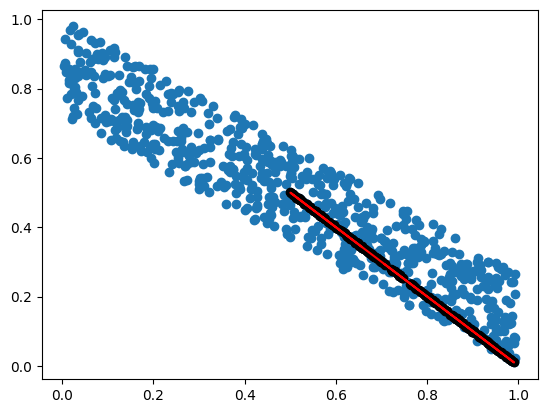

131 f(x) =  [-0.99993032] *x + 1.00002447086438
132 f(x) =  [-0.99991448] *x + 0.9999954551061568
133 f(x) =  [-0.99976218] *x + 0.9998745976818806
134 f(x) =  [-0.99974461] *x + 0.9998642759588153
135 f(x) =  [-0.99976292] *x + 0.9998887801540461
136 f(x) =  [-0.99972722] *x + 0.9998886342851534
137 f(x) =  [-0.99981909] *x + 0.9999456228912615
138 f(x) =  [-0.99979388] *x + 0.9999184795671067
139 f(x) =  [-0.99976847] *x + 0.9998669034672462
140 f(x) =  [-0.99983051] *x + 0.9998883744357864


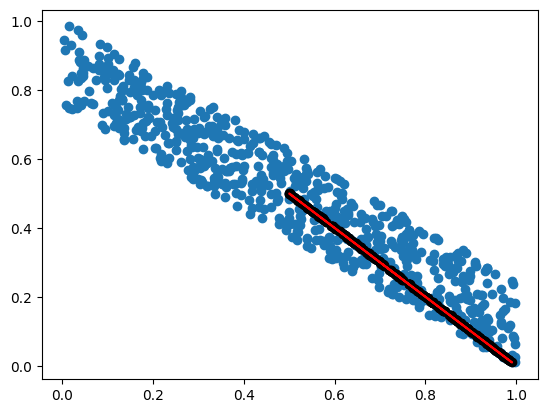

141 f(x) =  [-0.99983051] *x + 0.9998883744357864
142 f(x) =  [-0.99992418] *x + 0.9999479828470919
143 f(x) =  [-1.0000174] *x + 1.0000023194301415
144 f(x) =  [-1.00009036] *x + 1.000067110601609
145 f(x) =  [-1.00003372] *x + 1.0000292739234775
146 f(x) =  [-0.99997794] *x + 0.9999876806926897
147 f(x) =  [-1.00000037] *x + 1.0000033641128547
148 f(x) =  [-1.00005258] *x + 1.0000310208956158
149 f(x) =  [-0.99995358] *x + 0.9999654876662418
150 f(x) =  [-0.99991381] *x + 0.9999386041885993


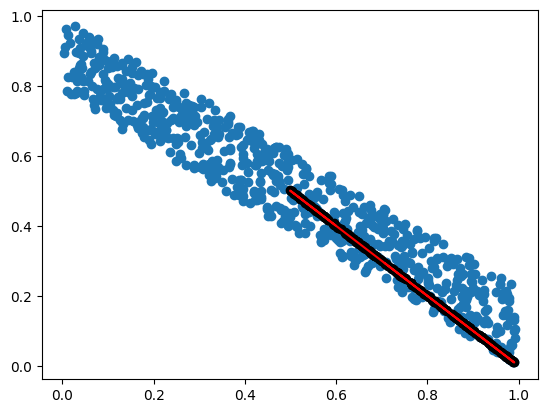

151 f(x) =  [-0.99996819] *x + 0.9999820624233509
152 f(x) =  [-1.00001414] *x + 1.0000143260955747
153 f(x) =  [-0.99997697] *x + 0.9999811732366934
154 f(x) =  [-1.0000826] *x + 1.0000744757197657
155 f(x) =  [-1.00007619] *x + 1.0000789796916276
156 f(x) =  [-1.00005574] *x + 1.0000638282543786
157 f(x) =  [-1.00020364] *x + 1.000166377741274
158 f(x) =  [-1.00018368] *x + 1.000148694432641
159 f(x) =  [-1.00011001] *x + 1.000089932942987
160 f(x) =  [-1.00017207] *x + 1.0001268556377503


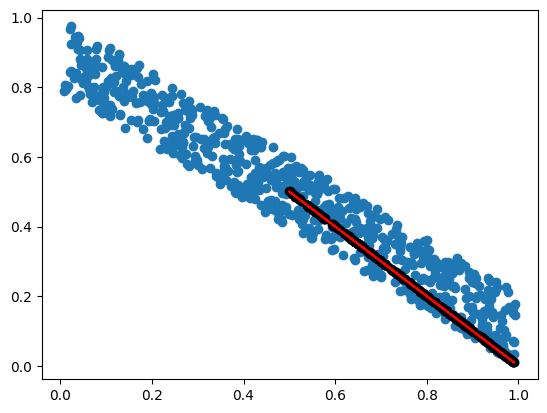

161 f(x) =  [-1.00014046] *x + 1.000123554726925
162 f(x) =  [-1.00019271] *x + 1.0001609980256525
163 f(x) =  [-1.00020912] *x + 1.0001684500320476
164 f(x) =  [-1.00002815] *x + 1.0000230127364627
165 f(x) =  [-1.00001786] *x + 1.0000302579385376
166 f(x) =  [-1.00013639] *x + 1.0001172081869432
167 f(x) =  [-1.00004356] *x + 1.0000446033459338
168 f(x) =  [-0.99986824] *x + 0.9999208027373165
169 f(x) =  [-0.99983769] *x + 0.9999029867247795
170 f(x) =  [-0.9996522] *x + 0.9997806164937789


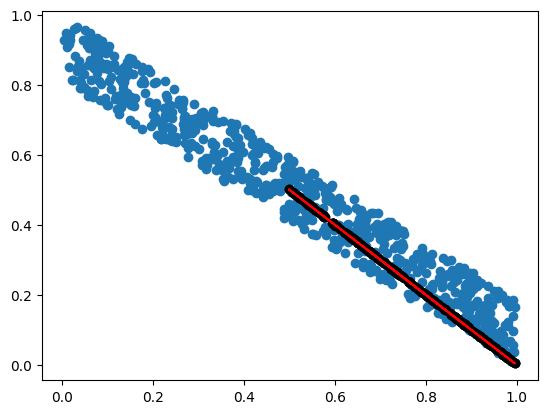

171 f(x) =  [-0.99968663] *x + 0.999790832654831
172 f(x) =  [-0.99964861] *x + 0.999766923680527
173 f(x) =  [-0.99962763] *x + 0.9997458885530397
174 f(x) =  [-0.99964263] *x + 0.9997532076958079
175 f(x) =  [-0.99966545] *x + 0.9997837035232668
176 f(x) =  [-0.99976861] *x + 0.9998417987127369
177 f(x) =  [-0.99987361] *x + 0.9999136943772721
178 f(x) =  [-0.99987268] *x + 0.999901873626411
179 f(x) =  [-0.99986106] *x + 0.9998971219175965
180 f(x) =  [-0.99990093] *x + 0.999926733613961


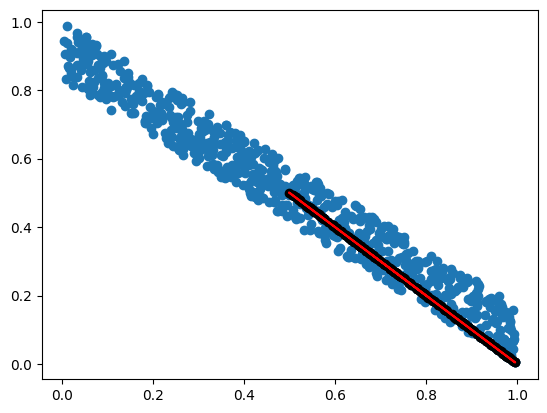

181 f(x) =  [-0.99989187] *x + 0.9999258388488111
182 f(x) =  [-0.99991593] *x + 0.9999379001292481
183 f(x) =  [-0.99985608] *x + 0.9999045345305595
184 f(x) =  [-0.9997788] *x + 0.9998424057088999
185 f(x) =  [-0.99975935] *x + 0.9998266277348261
186 f(x) =  [-0.99979488] *x + 0.9998603498492679
187 f(x) =  [-0.99983138] *x + 0.9998794666484767
188 f(x) =  [-0.99987815] *x + 0.9999174238278592
189 f(x) =  [-0.99987369] *x + 0.9999239991979412
190 f(x) =  [-0.99991866] *x + 0.9999574478826068


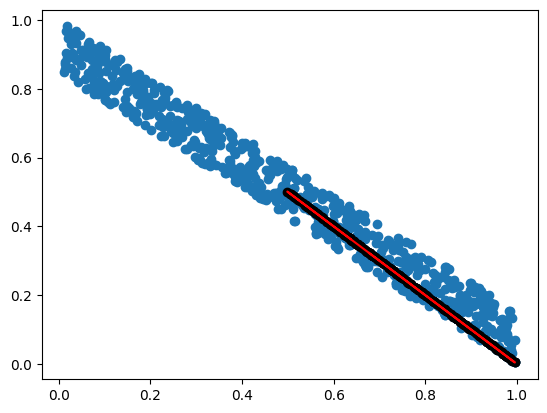

191 f(x) =  [-0.99992351] *x + 0.9999649806434077
192 f(x) =  [-0.9998807] *x + 0.9999386454768062
193 f(x) =  [-0.99992075] *x + 0.9999637553212426
194 f(x) =  [-0.99995625] *x + 0.9999899272872428
195 f(x) =  [-0.99994916] *x + 0.9999741524393553
196 f(x) =  [-0.99991801] *x + 0.9999563267541788
197 f(x) =  [-0.99993083] *x + 0.9999649386133924
198 f(x) =  [-0.99994247] *x + 0.999975329851218
199 f(x) =  [-0.99988518] *x + 0.999935420610316
200 f(x) =  [-0.99989687] *x + 0.9999425062001737


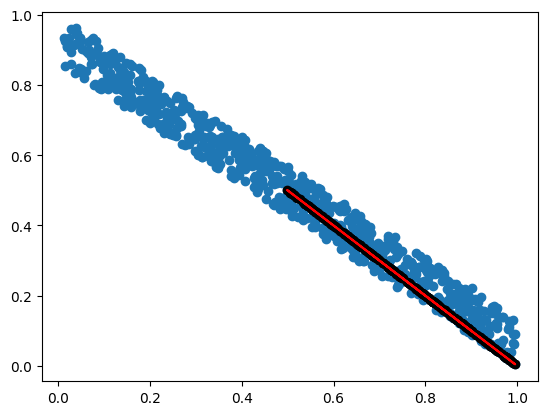

201 f(x) =  [-0.99992788] *x + 0.9999629940951897
202 f(x) =  [-0.9999715] *x + 0.9999932908504388
203 f(x) =  [-1.00004622] *x + 1.0000412082865149
204 f(x) =  [-1.00006494] *x + 1.000055216610606
205 f(x) =  [-1.00000226] *x + 1.0000087305686711
206 f(x) =  [-0.99999405] *x + 1.000000710163572
207 f(x) =  [-1.00006818] *x + 1.0000685387469688
208 f(x) =  [-1.00005617] *x + 1.0000633028293697
209 f(x) =  [-1.0000369] *x + 1.0000495179213658
210 f(x) =  [-1.00002411] *x + 1.000039643956165


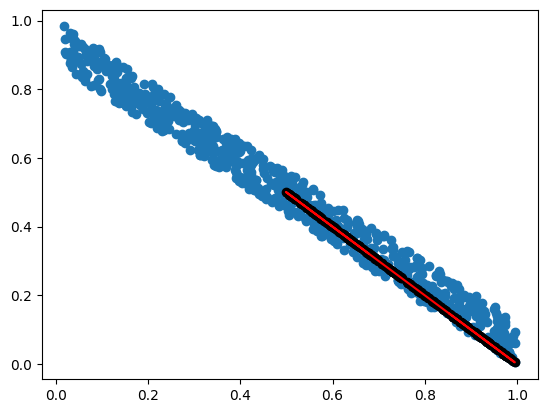

211 f(x) =  [-1.00002197] *x + 1.0000364164266253
212 f(x) =  [-1.00004793] *x + 1.000046714418955
213 f(x) =  [-1.00008816] *x + 1.0000753550505288
214 f(x) =  [-1.00006345] *x + 1.0000537281020634
215 f(x) =  [-1.00004566] *x + 1.0000387839199563
216 f(x) =  [-1.0000077] *x + 1.0000110449242887
217 f(x) =  [-0.99998498] *x + 0.9999907970386255
218 f(x) =  [-0.99995547] *x + 0.9999685415313889
219 f(x) =  [-0.99999881] *x + 0.9999944340129913
220 f(x) =  [-0.99998735] *x + 0.9999833718632588


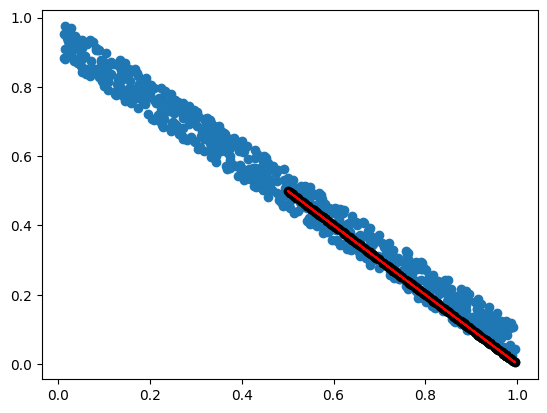

221 f(x) =  [-0.99996894] *x + 0.9999654826101987
222 f(x) =  [-0.99994354] *x + 0.9999431286956189
223 f(x) =  [-0.99990365] *x + 0.9999101744668693
224 f(x) =  [-0.99987648] *x + 0.9998975414339153
225 f(x) =  [-0.99989606] *x + 0.9999082872288834
226 f(x) =  [-0.99991404] *x + 0.9999205791974504
227 f(x) =  [-0.99991316] *x + 0.9999162934940049
228 f(x) =  [-0.99990957] *x + 0.9999173647146202
229 f(x) =  [-0.99991673] *x + 0.9999237959086881
230 f(x) =  [-0.99993115] *x + 0.9999379685168317


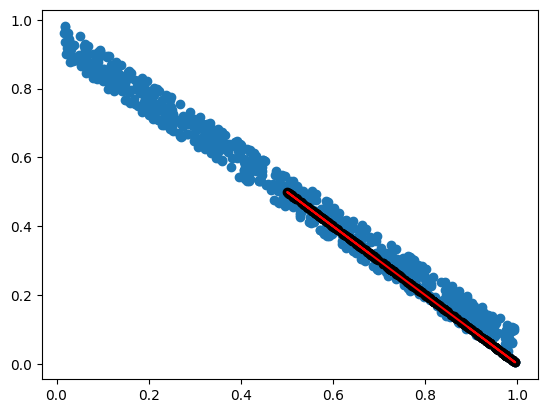

231 f(x) =  [-0.99989883] *x + 0.9999168307416656
232 f(x) =  [-0.99992226] *x + 0.9999327788349456
233 f(x) =  [-0.99991073] *x + 0.9999299380065041
234 f(x) =  [-0.99990689] *x + 0.999925301413692
235 f(x) =  [-0.99991629] *x + 0.9999322022997872
236 f(x) =  [-0.9999213] *x + 0.9999287652396578
237 f(x) =  [-0.99994409] *x + 0.9999455354644504
238 f(x) =  [-0.99997583] *x + 0.9999661405862399
239 f(x) =  [-0.99995899] *x + 0.9999551996660307
240 f(x) =  [-0.99995784] *x + 0.9999550492646729


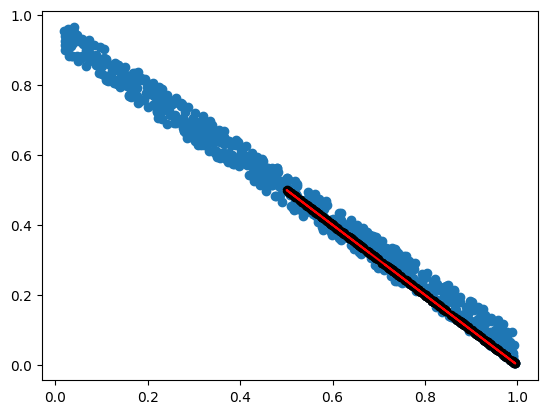

241 f(x) =  [-0.99994367] *x + 0.9999472120657884
242 f(x) =  [-0.99991887] *x + 0.9999282325870364
243 f(x) =  [-0.99994433] *x + 0.9999445965476248
244 f(x) =  [-0.99995181] *x + 0.99994672097336
245 f(x) =  [-0.99997363] *x + 0.9999613667244126
246 f(x) =  [-0.99997034] *x + 0.9999601869392805
247 f(x) =  [-1.0000036] *x + 0.9999838050187431
248 f(x) =  [-1.00001992] *x + 0.9999970329328495
249 f(x) =  [-1.0000054] *x + 0.9999851083952023
250 f(x) =  [-1.00000095] *x + 0.9999807993911398


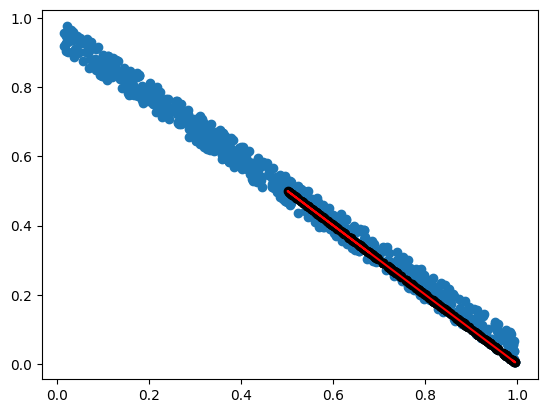

251 f(x) =  [-0.9999894] *x + 0.9999740379944989
252 f(x) =  [-0.99999135] *x + 0.999973391038075
253 f(x) =  [-0.99996111] *x + 0.9999512159427831
254 f(x) =  [-0.99997294] *x + 0.9999614948742723
255 f(x) =  [-0.99997066] *x + 0.9999590490341198
256 f(x) =  [-0.9999929] *x + 0.9999789627082712
257 f(x) =  [-0.99997153] *x + 0.9999664517036025
258 f(x) =  [-0.99997278] *x + 0.9999654700753069
259 f(x) =  [-0.99996244] *x + 0.9999569050186868
260 f(x) =  [-0.99996641] *x + 0.999958779389007


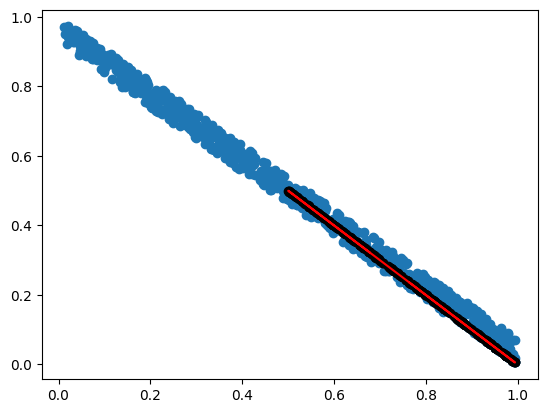

261 f(x) =  [-0.99996562] *x + 0.9999591592913233
262 f(x) =  [-0.99995849] *x + 0.9999577300709994
263 f(x) =  [-0.99993787] *x + 0.9999394656346303
264 f(x) =  [-0.99993464] *x + 0.9999393415205985
265 f(x) =  [-0.99995043] *x + 0.9999437317072957
266 f(x) =  [-0.99995829] *x + 0.9999515674227325
267 f(x) =  [-0.99999066] *x + 0.9999771991421169
268 f(x) =  [-0.99999477] *x + 0.9999793409312974
269 f(x) =  [-1.00000045] *x + 0.9999813971292439
270 f(x) =  [-1.00001503] *x + 0.9999900393123926


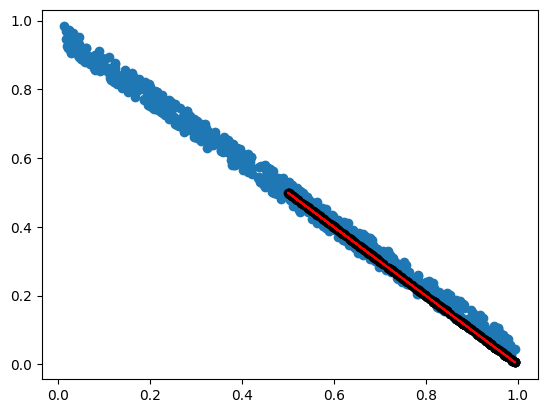

271 f(x) =  [-1.00001965] *x + 0.9999951190545591
272 f(x) =  [-1.00001965] *x + 0.9999951190545591
273 f(x) =  [-1.00004189] *x + 1.0000154039032203
274 f(x) =  [-1.00005272] *x + 1.0000249454508172
275 f(x) =  [-1.00003427] *x + 1.0000087390804677
276 f(x) =  [-1.00003178] *x + 1.0000108560980985
277 f(x) =  [-1.00002396] *x + 1.000006442445014
278 f(x) =  [-1.00000707] *x + 0.999994724303134
279 f(x) =  [-1.00000397] *x + 0.9999937271389754
280 f(x) =  [-1.0000099] *x + 0.9999996600679614


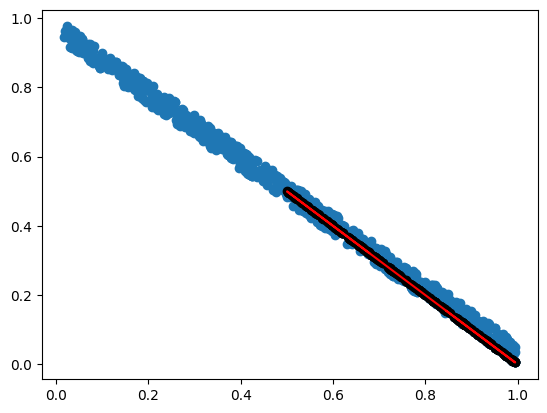

281 f(x) =  [-1.00001926] *x + 1.000004402704867
282 f(x) =  [-1.00002111] *x + 1.0000053483256692
283 f(x) =  [-1.00002645] *x + 1.0000091557473128
284 f(x) =  [-1.00001511] *x + 1.0000030866915102
285 f(x) =  [-1.00001317] *x + 1.000003089665185
286 f(x) =  [-1.00001601] *x + 1.000004639647393
287 f(x) =  [-0.99999925] *x + 0.9999916753261557
288 f(x) =  [-1.00001908] *x + 1.0000039492486794
289 f(x) =  [-1.00002445] *x + 1.0000084188332345
290 f(x) =  [-1.00001089] *x + 1.0000012221215508


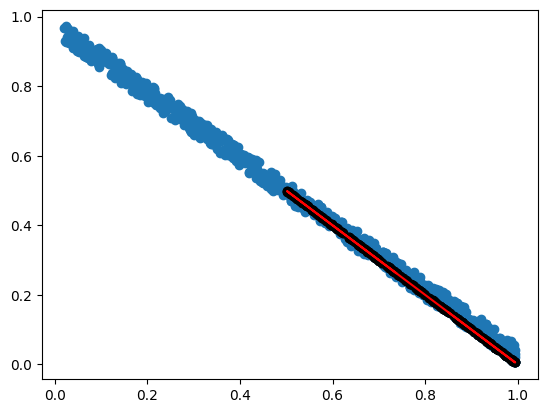

291 f(x) =  [-1.00000454] *x + 0.9999965860642471
292 f(x) =  [-0.99999916] *x + 0.9999910023251104
293 f(x) =  [-1.00001424] *x + 1.0000010396165386
294 f(x) =  [-1.00001547] *x + 1.0000027779528537
295 f(x) =  [-1.0000102] *x + 0.999998863447101
296 f(x) =  [-1.0000013] *x + 0.9999928343889344
297 f(x) =  [-0.99998448] *x + 0.9999797165830605
298 f(x) =  [-1.00001014] *x + 0.999999703598027
299 f(x) =  [-1.00001923] *x + 1.0000059427524117
300 f(x) =  [-1.00002427] *x + 1.000008717321623


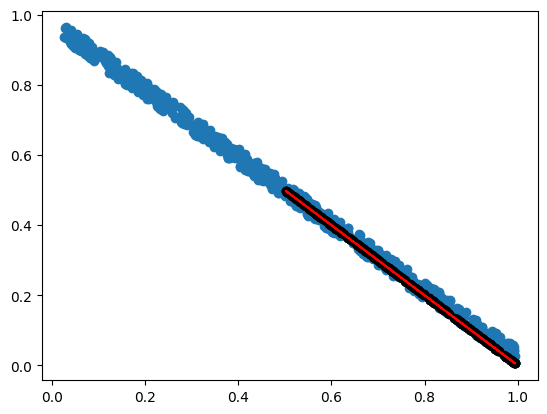

301 f(x) =  [-1.00003085] *x + 1.000012297908066
302 f(x) =  [-1.00003273] *x + 1.000013256708141
303 f(x) =  [-1.00003998] *x + 1.0000181554230225
304 f(x) =  [-1.0000355] *x + 1.0000149365239022
305 f(x) =  [-1.0000355] *x + 1.0000149365239022
306 f(x) =  [-1.00003897] *x + 1.0000175356548626
307 f(x) =  [-1.00002415] *x + 1.0000076229112609
308 f(x) =  [-1.00000822] *x + 0.999998100209922
309 f(x) =  [-1.00000239] *x + 0.9999931422447714
310 f(x) =  [-1.00000719] *x + 0.999997901927283


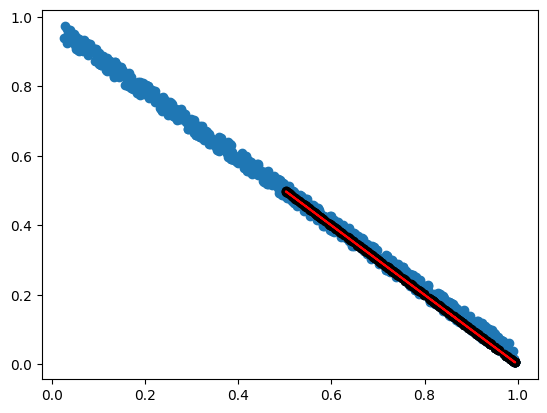

311 f(x) =  [-1.00001634] *x + 1.0000054548118706
312 f(x) =  [-1.00001936] *x + 1.0000088282732424
313 f(x) =  [-1.00002196] *x + 1.0000118022370683
314 f(x) =  [-1.00002196] *x + 1.0000118022370683
315 f(x) =  [-1.00002091] *x + 1.0000118485107088
316 f(x) =  [-1.00001454] *x + 1.0000077722903886
317 f(x) =  [-1.00001028] *x + 1.0000061855406297
318 f(x) =  [-1.00000744] *x + 1.0000049903150323
319 f(x) =  [-1.00003683] *x + 1.000026217320607
320 f(x) =  [-1.00004882] *x + 1.0000351464000092


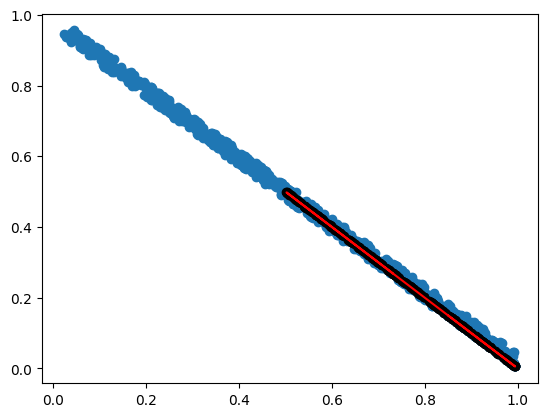

321 f(x) =  [-1.00004882] *x + 1.0000351464000092
322 f(x) =  [-1.00004322] *x + 1.0000283945810042
323 f(x) =  [-1.00003742] *x + 1.0000255017691924
324 f(x) =  [-1.00003928] *x + 1.000027220557159
325 f(x) =  [-1.00003836] *x + 1.0000277639416162
326 f(x) =  [-1.00003398] *x + 1.0000260956743472
327 f(x) =  [-1.00002706] *x + 1.0000216560423665
328 f(x) =  [-1.00002678] *x + 1.0000203574396371
329 f(x) =  [-1.0000302] *x + 1.000023033621836
330 f(x) =  [-1.00003682] *x + 1.0000286240911114


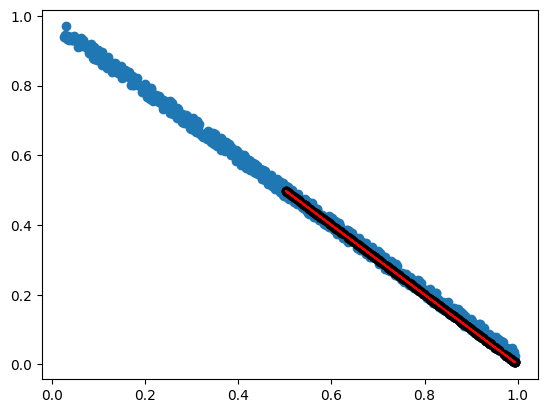

331 f(x) =  [-1.00004253] *x + 1.000031373582266
332 f(x) =  [-1.00002961] *x + 1.000021695862418
333 f(x) =  [-1.00003867] *x + 1.0000301858695857
334 f(x) =  [-1.00004578] *x + 1.0000355113408712
335 f(x) =  [-1.00003876] *x + 1.0000296929020653
336 f(x) =  [-1.00003288] *x + 1.0000251780423086
337 f(x) =  [-1.00002942] *x + 1.0000238721407393
338 f(x) =  [-1.00003454] *x + 1.0000275592734875
339 f(x) =  [-1.00003544] *x + 1.000028115787768
340 f(x) =  [-1.00002104] *x + 1.0000178003361726


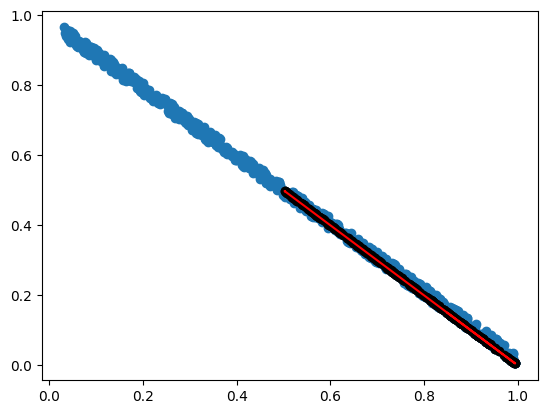

341 f(x) =  [-1.0000117] *x + 1.0000099443733708
342 f(x) =  [-1.00000666] *x + 1.000006725557429
343 f(x) =  [-1.00000666] *x + 1.000006725557429
344 f(x) =  [-1.00000504] *x + 1.000004788142448
345 f(x) =  [-1.00000125] *x + 1.0000021466628262
346 f(x) =  [-1.00000757] *x + 1.000007117363463
347 f(x) =  [-1.00001792] *x + 1.0000157832006598
348 f(x) =  [-1.00002086] *x + 1.0000182918282232
349 f(x) =  [-1.00001104] *x + 1.0000102467145497
350 f(x) =  [-1.00000065] *x + 1.000002871474107


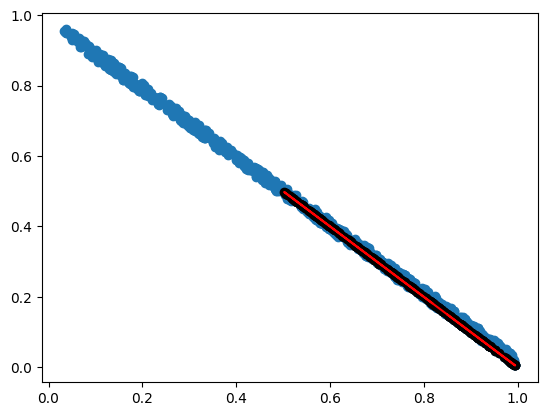

351 f(x) =  [-1.00000454] *x + 1.0000061037639838
352 f(x) =  [-1.00001432] *x + 1.0000142572224557
353 f(x) =  [-1.0000211] *x + 1.0000178003278661
354 f(x) =  [-1.00001772] *x + 1.0000173511872326
355 f(x) =  [-1.00001427] *x + 1.0000133943887812
356 f(x) =  [-1.00000834] *x + 1.0000083576449463
357 f(x) =  [-1.0000117] *x + 1.000011006477642
358 f(x) =  [-1.00001187] *x + 1.0000098186256072
359 f(x) =  [-1.00001637] *x + 1.0000139014599516
360 f(x) =  [-1.0000153] *x + 1.0000126773258189


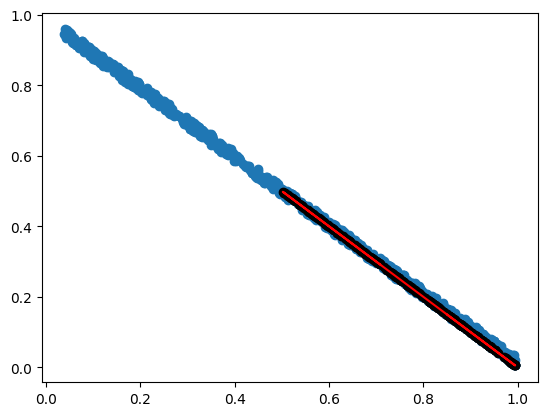

361 f(x) =  [-1.00000893] *x + 1.0000071377186779
362 f(x) =  [-1.00001811] *x + 1.0000140199641419
363 f(x) =  [-1.00002078] *x + 1.0000161142139163
364 f(x) =  [-1.00002742] *x + 1.000022385195873
365 f(x) =  [-1.00003002] *x + 1.0000239782698552
366 f(x) =  [-1.0000237] *x + 1.0000186011138554
367 f(x) =  [-1.00002274] *x + 1.0000176563716854
368 f(x) =  [-1.00002697] *x + 1.0000221283871868
369 f(x) =  [-1.00002882] *x + 1.000022576049971
370 f(x) =  [-1.00003088] *x + 1.0000244460106527


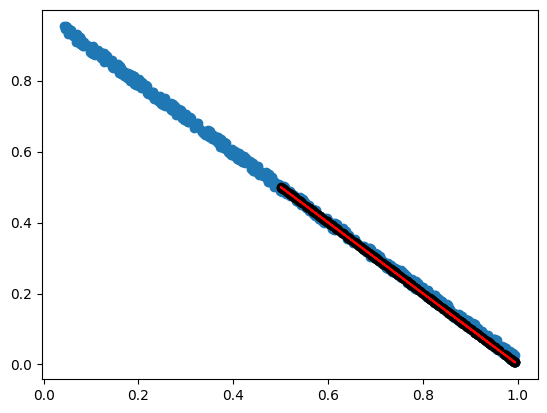

371 f(x) =  [-1.00003952] *x + 1.0000302100166576
372 f(x) =  [-1.00003221] *x + 1.0000248569505084
373 f(x) =  [-1.00003708] *x + 1.000028014759159
374 f(x) =  [-1.00003669] *x + 1.0000283063399882
375 f(x) =  [-1.00004185] *x + 1.0000315915170734
376 f(x) =  [-1.00004047] *x + 1.0000311260633077
377 f(x) =  [-1.00003815] *x + 1.0000294375201941
378 f(x) =  [-1.00004613] *x + 1.000036002806115
379 f(x) =  [-1.00004867] *x + 1.0000387036310743
380 f(x) =  [-1.00004634] *x + 1.0000366412083563


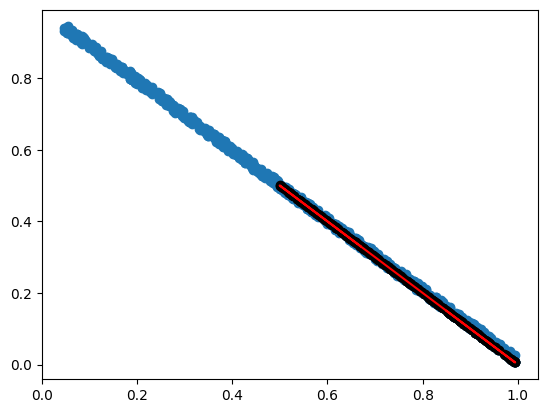

381 f(x) =  [-1.0000466] *x + 1.0000359188030887
382 f(x) =  [-1.0000466] *x + 1.0000359188030887
383 f(x) =  [-1.00005221] *x + 1.0000401323602717
384 f(x) =  [-1.00005016] *x + 1.000038615785802
385 f(x) =  [-1.00004676] *x + 1.0000358785232295
386 f(x) =  [-1.00004316] *x + 1.0000327491594145
387 f(x) =  [-1.00004261] *x + 1.0000324693705989
388 f(x) =  [-1.00004448] *x + 1.0000340363146143
389 f(x) =  [-1.00004153] *x + 1.0000317226769033
390 f(x) =  [-1.00004244] *x + 1.0000318099070262


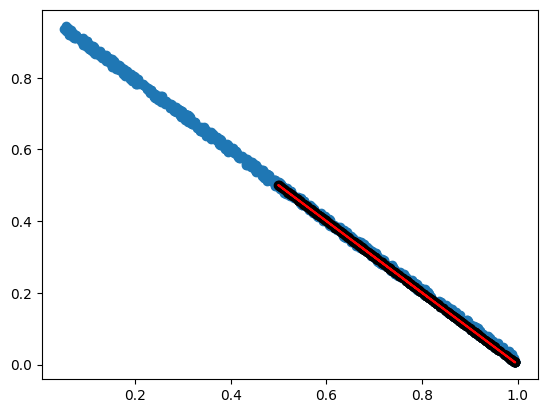

391 f(x) =  [-1.00003966] *x + 1.000029295857965
392 f(x) =  [-1.00004039] *x + 1.000029613164849
393 f(x) =  [-1.00004039] *x + 1.000029613164849
394 f(x) =  [-1.00003665] *x + 1.0000270459166996
395 f(x) =  [-1.00003577] *x + 1.0000268518465916
396 f(x) =  [-1.00003345] *x + 1.0000258838542493
397 f(x) =  [-1.00003511] *x + 1.0000267223847503
398 f(x) =  [-1.00002972] *x + 1.0000220085697302
399 f(x) =  [-1.00003294] *x + 1.0000241516513682
400 f(x) =  [-1.00002772] *x + 1.0000195600599855


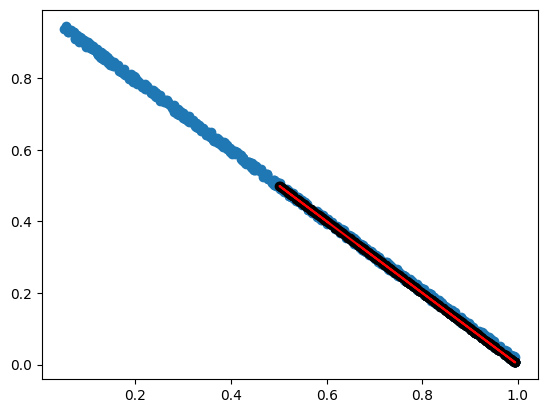

401 f(x) =  [-1.00002772] *x + 1.0000195600599855
402 f(x) =  [-1.00003449] *x + 1.0000243013023191
403 f(x) =  [-1.00003039] *x + 1.000020815603078
404 f(x) =  [-1.00002805] *x + 1.0000185903304268
405 f(x) =  [-1.00002374] *x + 1.00001565044951
406 f(x) =  [-1.000026] *x + 1.0000172152206652
407 f(x) =  [-1.00002418] *x + 1.0000159522184782
408 f(x) =  [-1.00002462] *x + 1.0000163352572096
409 f(x) =  [-1.00002599] *x + 1.000017944595745
410 f(x) =  [-1.00002521] *x + 1.0000180645419394


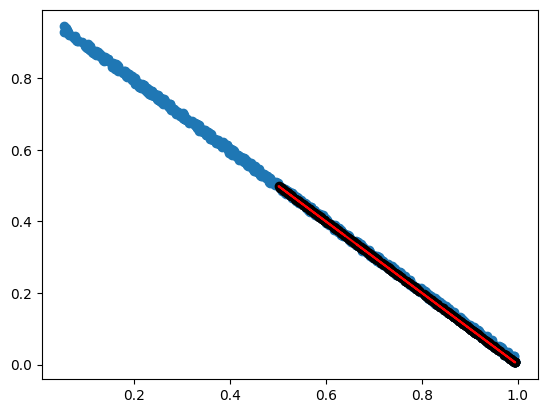

411 f(x) =  [-1.00002816] *x + 1.0000209056551772
412 f(x) =  [-1.00002511] *x + 1.0000181811030884
413 f(x) =  [-1.00002098] *x + 1.0000147716355645
414 f(x) =  [-1.00002277] *x + 1.0000158276334172
415 f(x) =  [-1.00002588] *x + 1.0000188453278818
416 f(x) =  [-1.00002387] *x + 1.0000174959138834
417 f(x) =  [-1.00002464] *x + 1.0000180220367598
418 f(x) =  [-1.00002851] *x + 1.0000209761808132
419 f(x) =  [-1.00002455] *x + 1.0000180741414773
420 f(x) =  [-1.00002455] *x + 1.0000180741414773


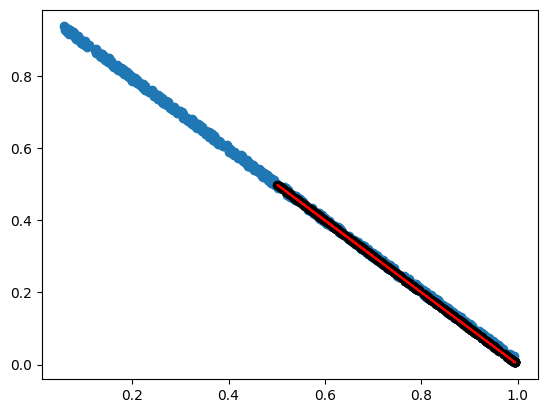

421 f(x) =  [-1.00002484] *x + 1.0000176209215972
422 f(x) =  [-1.00002484] *x + 1.0000176209215972
423 f(x) =  [-1.00002048] *x + 1.0000144108017919
424 f(x) =  [-1.00001797] *x + 1.0000128132450383
425 f(x) =  [-1.00001951] *x + 1.0000143824857322
426 f(x) =  [-1.00001954] *x + 1.000013921806038
427 f(x) =  [-1.00002004] *x + 1.0000142555132052
428 f(x) =  [-1.00002004] *x + 1.0000142555132052
429 f(x) =  [-1.0000209] *x + 1.000015341286989
430 f(x) =  [-1.00002244] *x + 1.0000161583623128


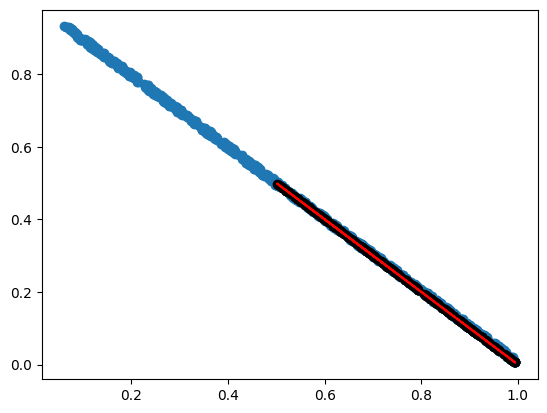

431 f(x) =  [-1.00002244] *x + 1.0000161583623128
432 f(x) =  [-1.00002542] *x + 1.0000178390712047
433 f(x) =  [-1.00002687] *x + 1.0000190888843952
434 f(x) =  [-1.0000295] *x + 1.0000207017929985
435 f(x) =  [-1.00002938] *x + 1.0000210875413071
436 f(x) =  [-1.00002852] *x + 1.0000199820065576
437 f(x) =  [-1.00002852] *x + 1.0000199820065576
438 f(x) =  [-1.00002771] *x + 1.0000187016456965
439 f(x) =  [-1.00002679] *x + 1.0000177100273784
440 f(x) =  [-1.00002773] *x + 1.0000184664028966


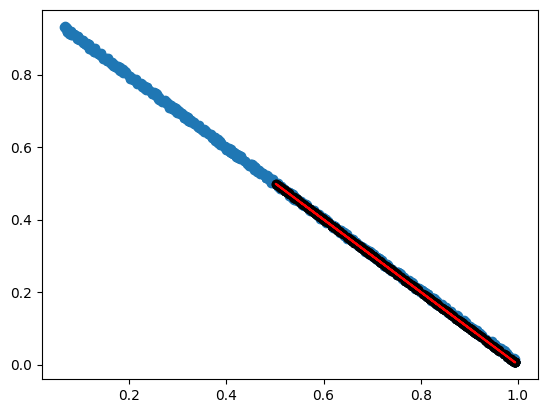

441 f(x) =  [-1.0000288] *x + 1.0000195748081757
442 f(x) =  [-1.00002411] *x + 1.0000158734910927
443 f(x) =  [-1.00002432] *x + 1.000016208177836
444 f(x) =  [-1.00002492] *x + 1.000016465861915
445 f(x) =  [-1.00002071] *x + 1.0000135835559312
446 f(x) =  [-1.000021] *x + 1.0000140926173058
447 f(x) =  [-1.00001968] *x + 1.000012337481328
448 f(x) =  [-1.00002517] *x + 1.0000169436820219
449 f(x) =  [-1.00002869] *x + 1.0000193121978262
450 f(x) =  [-1.00002919] *x + 1.0000197559988842


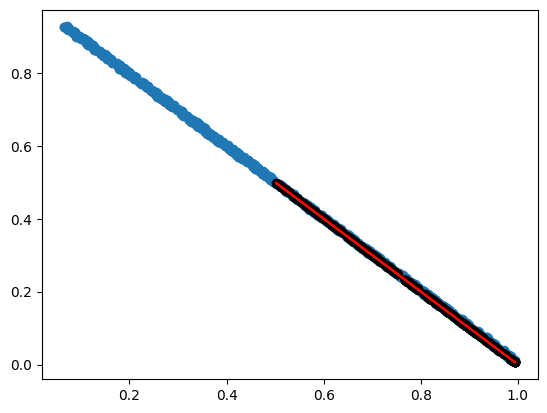

451 f(x) =  [-1.00003148] *x + 1.000021410632956
452 f(x) =  [-1.00003142] *x + 1.000021542168955
453 f(x) =  [-1.00003193] *x + 1.0000217082526197
454 f(x) =  [-1.00002573] *x + 1.0000167512921039
455 f(x) =  [-1.0000306] *x + 1.0000219677699491
456 f(x) =  [-1.0000306] *x + 1.0000219677699491
457 f(x) =  [-1.000028] *x + 1.000019940564626
458 f(x) =  [-1.00002558] *x + 1.0000181998483035
459 f(x) =  [-1.00002636] *x + 1.0000189855400103
460 f(x) =  [-1.00002588] *x + 1.0000188460479975


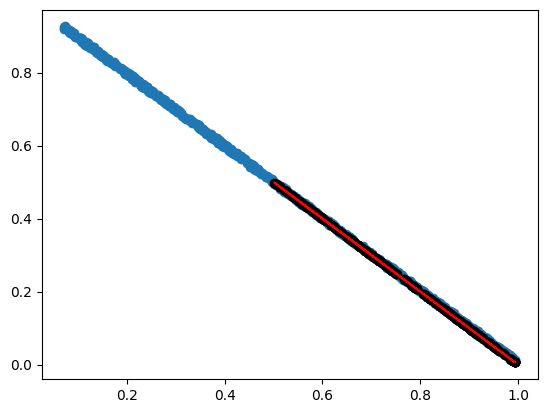

461 f(x) =  [-1.00002588] *x + 1.0000188460479975
462 f(x) =  [-1.00002459] *x + 1.000018408049825
463 f(x) =  [-1.00002678] *x + 1.0000199677635482
464 f(x) =  [-1.0000272] *x + 1.0000201722278146
465 f(x) =  [-1.00002526] *x + 1.000019137311532
466 f(x) =  [-1.00002468] *x + 1.0000184786496389
467 f(x) =  [-1.00002653] *x + 1.0000196265095707
468 f(x) =  [-1.00002414] *x + 1.0000173159025956
469 f(x) =  [-1.00002731] *x + 1.0000202676208019
470 f(x) =  [-1.00002748] *x + 1.0000202289444609


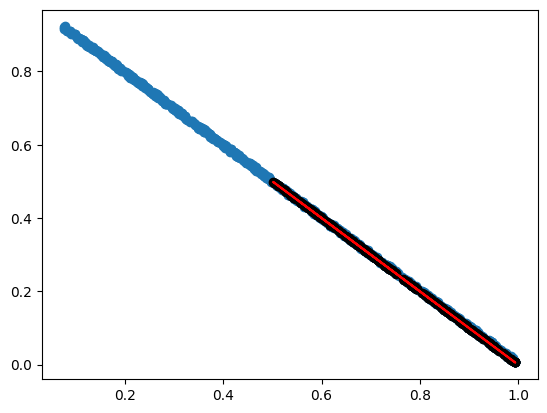

471 f(x) =  [-1.00002646] *x + 1.0000199004160935
472 f(x) =  [-1.00002295] *x + 1.0000177654551379
473 f(x) =  [-1.00002374] *x + 1.0000182567740927
474 f(x) =  [-1.00002164] *x + 1.0000171198783676
475 f(x) =  [-1.00001973] *x + 1.000015634412442
476 f(x) =  [-1.00001916] *x + 1.0000154192466613
477 f(x) =  [-1.00001672] *x + 1.000014004732498
478 f(x) =  [-1.00001543] *x + 1.000012866987448
479 f(x) =  [-1.00001477] *x + 1.000012443249489
480 f(x) =  [-1.00001508] *x + 1.0000125434936076


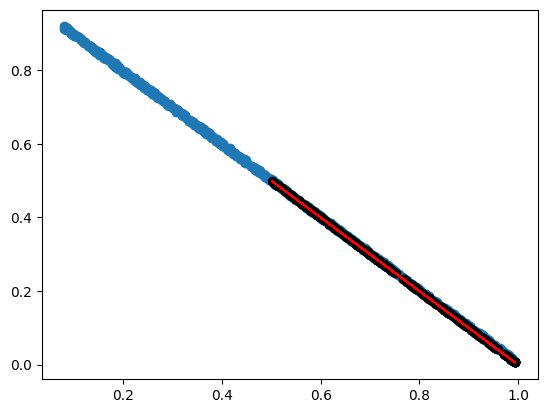

481 f(x) =  [-1.00001691] *x + 1.0000136847622483
482 f(x) =  [-1.00001732] *x + 1.0000138270788463
483 f(x) =  [-1.0000191] *x + 1.0000149194017536
484 f(x) =  [-1.00001854] *x + 1.0000143744212941
485 f(x) =  [-1.00001878] *x + 1.0000143834918735
486 f(x) =  [-1.00001802] *x + 1.0000139567472335
487 f(x) =  [-1.00001754] *x + 1.000013510387465
488 f(x) =  [-1.00001519] *x + 1.0000117763806147
489 f(x) =  [-1.00001232] *x + 1.0000098272632898
490 f(x) =  [-1.00001135] *x + 1.0000090939467452


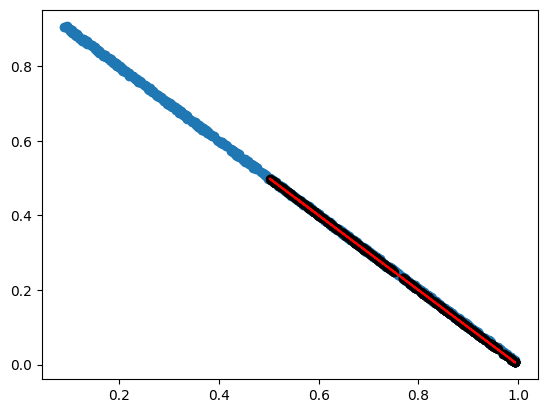

491 f(x) =  [-1.00000984] *x + 1.0000078488692328
492 f(x) =  [-1.00000959] *x + 1.0000074737280176
493 f(x) =  [-1.00000921] *x + 1.0000070229277025
494 f(x) =  [-1.00000799] *x + 1.0000054428083809
495 f(x) =  [-1.00000614] *x + 1.0000040586910743
496 f(x) =  [-1.00000893] *x + 1.0000060360294227
497 f(x) =  [-1.00001016] *x + 1.0000068560173672
498 f(x) =  [-1.00001225] *x + 1.000008739998525
499 f(x) =  [-1.00000992] *x + 1.0000068703549017
500 f(x) =  [-1.00000762] *x + 1.0000052667639967


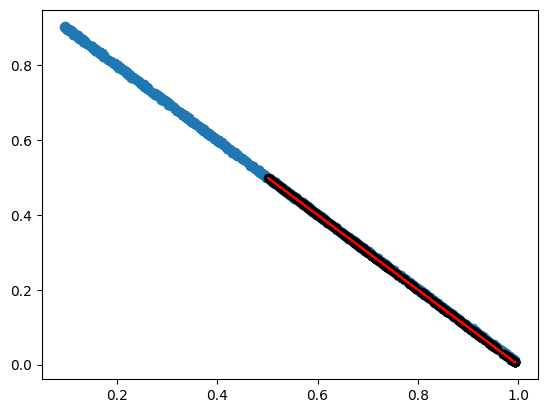

501 f(x) =  [-1.00000952] *x + 1.0000068812920593
502 f(x) =  [-1.00000935] *x + 1.000006476899574
503 f(x) =  [-1.00001024] *x + 1.0000071053402493
504 f(x) =  [-1.00000929] *x + 1.0000063401292887
505 f(x) =  [-1.00000939] *x + 1.0000067902385372
506 f(x) =  [-1.00000939] *x + 1.0000067902385372
507 f(x) =  [-1.00000552] *x + 1.000003747907965
508 f(x) =  [-1.00000423] *x + 1.0000026092219056
509 f(x) =  [-1.00000126] *x + 1.0000005145487039
510 f(x) =  [-1.00000124] *x + 1.0000009190871872


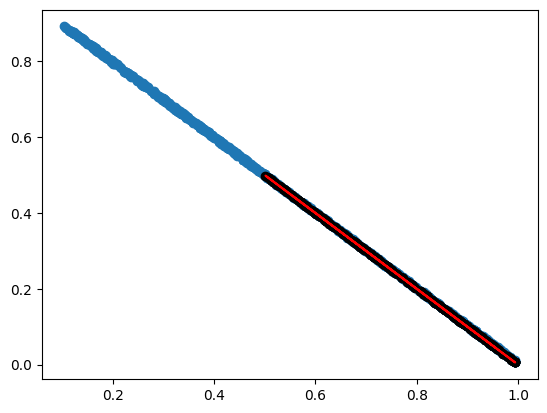

511 f(x) =  [-1.00000253] *x + 1.0000017531042746
512 f(x) =  [-1.00000187] *x + 1.0000014130641055
513 f(x) =  [-1.00000288] *x + 1.0000020486595171
514 f(x) =  [-1.00000324] *x + 1.000002543016269
515 f(x) =  [-1.00000491] *x + 1.0000036713439002
516 f(x) =  [-1.00000525] *x + 1.000003945212915
517 f(x) =  [-1.00000479] *x + 1.0000035401101193
518 f(x) =  [-1.00000259] *x + 1.000002034440558
519 f(x) =  [-1.00000162] *x + 1.0000012039522537
520 f(x) =  [-1.00000227] *x + 1.0000017407659962


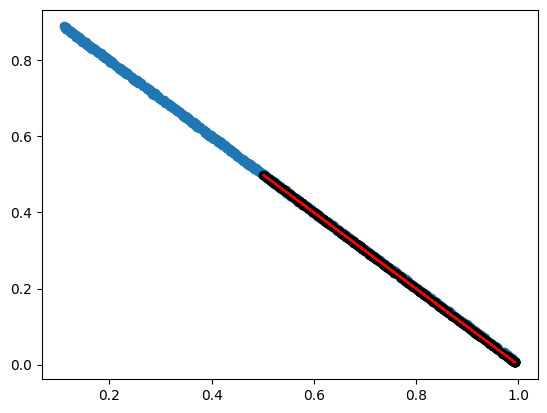

521 f(x) =  [-1.00000125] *x + 1.0000009224131863
522 f(x) =  [-1.00000448] *x + 1.0000032856017707
523 f(x) =  [-1.00000644] *x + 1.000004833828688
524 f(x) =  [-1.00000709] *x + 1.0000052159356712
525 f(x) =  [-1.00000637] *x + 1.0000046555649198
526 f(x) =  [-1.00000647] *x + 1.0000047834451022
527 f(x) =  [-1.00000647] *x + 1.0000047834451022
528 f(x) =  [-1.00000691] *x + 1.0000051012417188
529 f(x) =  [-1.00000603] *x + 1.000004495803289
530 f(x) =  [-1.00000672] *x + 1.0000050103847553


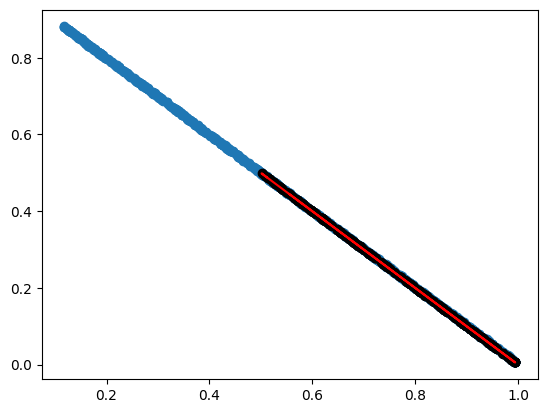

531 f(x) =  [-1.00000613] *x + 1.0000048303653308
532 f(x) =  [-1.00000613] *x + 1.00000490247769
533 f(x) =  [-1.00000765] *x + 1.0000060983273897
534 f(x) =  [-1.00000634] *x + 1.0000051412415139
535 f(x) =  [-1.00000515] *x + 1.0000044586552406
536 f(x) =  [-1.00000572] *x + 1.0000048863810045
537 f(x) =  [-1.00000397] *x + 1.0000037564522652
538 f(x) =  [-1.00000467] *x + 1.0000038564004097
539 f(x) =  [-1.00000624] *x + 1.0000049308766217
540 f(x) =  [-1.00000612] *x + 1.0000048660982288


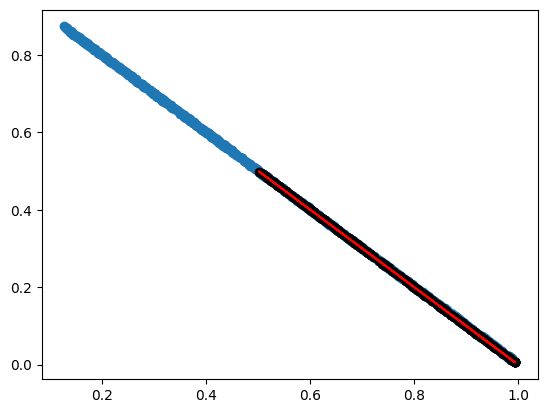

541 f(x) =  [-1.00000689] *x + 1.0000054064733923
542 f(x) =  [-1.00000676] *x + 1.000005258306448
543 f(x) =  [-1.00000593] *x + 1.0000046382300949
544 f(x) =  [-1.00000533] *x + 1.0000042394223094
545 f(x) =  [-1.00000604] *x + 1.000004744488192
546 f(x) =  [-1.00000704] *x + 1.000005303349429
547 f(x) =  [-1.00000572] *x + 1.0000042329132524
548 f(x) =  [-1.00000563] *x + 1.0000042254843455
549 f(x) =  [-1.00000569] *x + 1.0000044292460328
550 f(x) =  [-1.00000535] *x + 1.0000041679224823


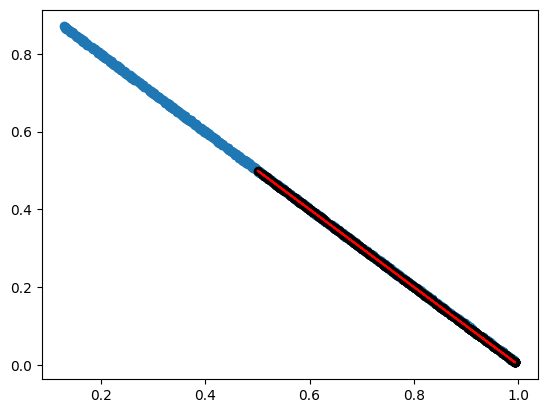

551 f(x) =  [-1.00000591] *x + 1.0000047254955697
552 f(x) =  [-1.00000552] *x + 1.0000044231165732
553 f(x) =  [-1.00000532] *x + 1.0000045521971939
554 f(x) =  [-1.00000529] *x + 1.000004524282768
555 f(x) =  [-1.00000474] *x + 1.0000040624729465
556 f(x) =  [-1.00000458] *x + 1.0000040262920746
557 f(x) =  [-1.00000492] *x + 1.0000042211014404
558 f(x) =  [-1.00000453] *x + 1.0000038538513567
559 f(x) =  [-1.00000389] *x + 1.000003477540066
560 f(x) =  [-1.00000304] *x + 1.0000030650588234


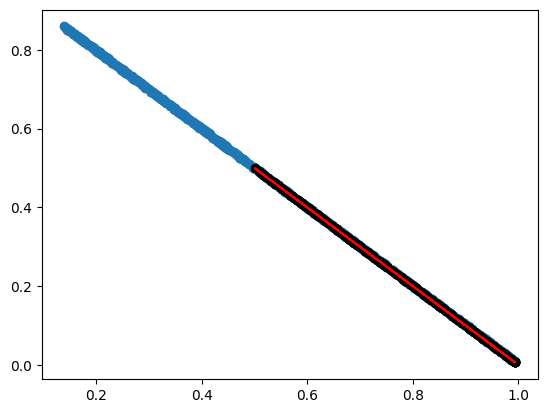

561 f(x) =  [-1.00000296] *x + 1.0000028097335367
562 f(x) =  [-1.00000214] *x + 1.0000021129953578
563 f(x) =  [-1.00000197] *x + 1.0000022331537446
564 f(x) =  [-1.00000168] *x + 1.0000019514414793
565 f(x) =  [-1.00000227] *x + 1.000002265955551
566 f(x) =  [-1.00000216] *x + 1.000002095164925
567 f(x) =  [-1.00000216] *x + 1.000002095164925
568 f(x) =  [-1.00000165] *x + 1.000001731089708
569 f(x) =  [-1.00000098] *x + 1.000000979739439
570 f(x) =  [-1.00000139] *x + 1.0000013069135527


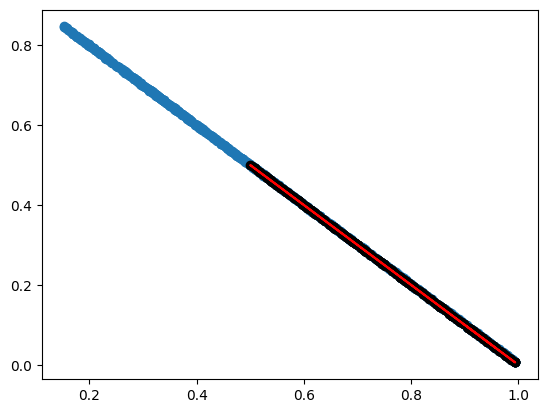

571 f(x) =  [-1.00000154] *x + 1.0000013173720874
572 f(x) =  [-1.00000002] *x + 1.0000002460191277
573 f(x) =  [-0.99999935] *x + 0.9999998404405275
574 f(x) =  [-0.99999963] *x + 0.9999999951611377
575 f(x) =  [-0.99999951] *x + 0.9999999222708338
576 f(x) =  [-0.9999989] *x + 0.9999992926256865
577 f(x) =  [-0.99999876] *x + 0.999999260700932
578 f(x) =  [-0.99999944] *x + 0.9999997377555243
579 f(x) =  [-0.99999944] *x + 0.9999997377555243
580 f(x) =  [-0.9999994] *x + 0.9999998045035356


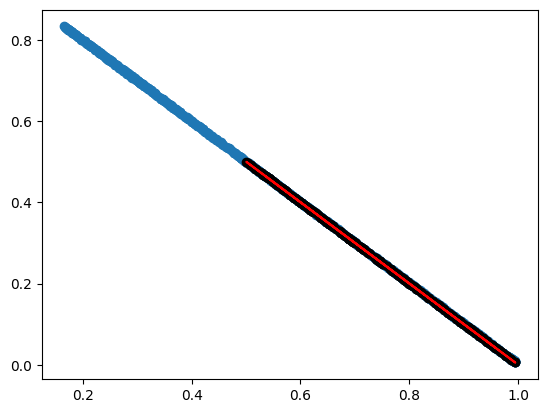

581 f(x) =  [-0.99999922] *x + 0.9999995137053574
582 f(x) =  [-0.99999866] *x + 0.999999071078993
583 f(x) =  [-0.99999875] *x + 0.9999991944984543
584 f(x) =  [-0.9999986] *x + 0.999999182837882
585 f(x) =  [-0.99999791] *x + 0.9999986191633798
586 f(x) =  [-0.99999835] *x + 0.9999989777006157
587 f(x) =  [-0.99999889] *x + 0.9999992625454663
588 f(x) =  [-0.99999913] *x + 0.9999994704384405
589 f(x) =  [-0.99999913] *x + 0.9999994704384405
590 f(x) =  [-0.99999943] *x + 0.9999995401180033


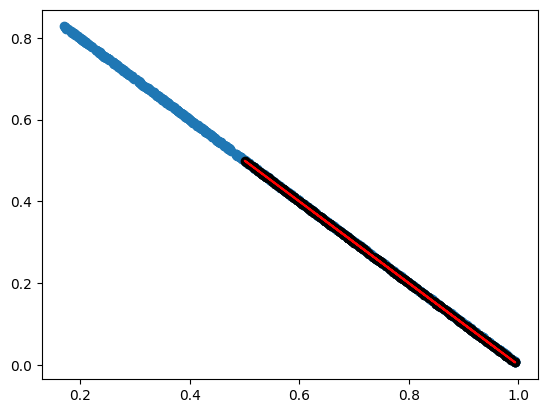

591 f(x) =  [-0.99999952] *x + 0.9999995851739956
592 f(x) =  [-0.99999965] *x + 0.9999996344620588
593 f(x) =  [-0.99999893] *x + 0.9999990190728518
594 f(x) =  [-0.9999992] *x + 0.9999992974305809
595 f(x) =  [-0.99999988] *x + 0.9999998363349545
596 f(x) =  [-0.99999945] *x + 0.9999994852434254
597 f(x) =  [-0.99999971] *x + 0.999999761362224
598 f(x) =  [-0.99999972] *x + 0.9999996900159316
599 f(x) =  [-1.00000011] *x + 1.0000000541002243
600 f(x) =  [-1.00000042] *x + 1.0000001168078234


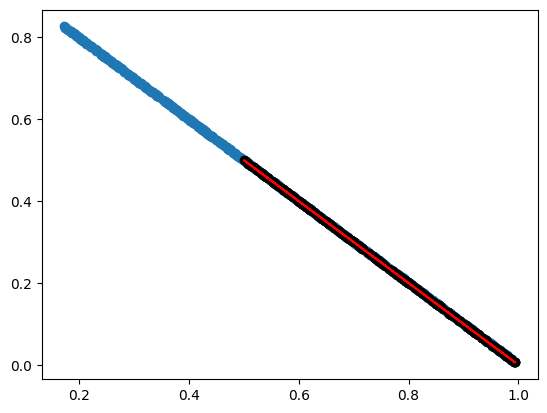

601 f(x) =  [-0.99999988] *x + 0.999999719232147
602 f(x) =  [-1.00000013] *x + 0.999999882329444
603 f(x) =  [-1.00000013] *x + 0.999999882329444
604 f(x) =  [-1.00000016] *x + 0.9999999210246999
605 f(x) =  [-0.99999923] *x + 0.9999991653132211
606 f(x) =  [-0.99999979] *x + 0.9999996091926324
607 f(x) =  [-1.00000025] *x + 1.0000000246126104
608 f(x) =  [-0.99999954] *x + 0.9999994022518404
609 f(x) =  [-0.999999] *x + 0.9999990440894858
610 f(x) =  [-0.99999891] *x + 0.9999989764418922


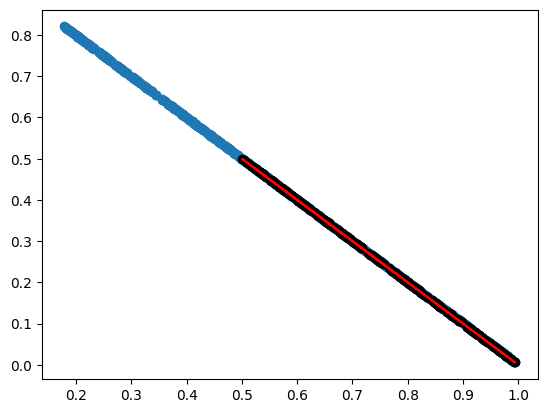

611 f(x) =  [-0.99999911] *x + 0.9999991324396894
612 f(x) =  [-0.99999995] *x + 0.9999997228381461
613 f(x) =  [-0.99999992] *x + 0.9999997109879948
614 f(x) =  [-1.0000008] *x + 1.0000003300243656
615 f(x) =  [-1.00000111] *x + 1.0000006127957577
616 f(x) =  [-1.00000103] *x + 1.0000004861654648
617 f(x) =  [-1.00000092] *x + 1.0000005461707562
618 f(x) =  [-1.00000131] *x + 1.0000008061575396
619 f(x) =  [-1.00000141] *x + 1.000001056087932
620 f(x) =  [-1.00000079] *x + 1.0000005793765274


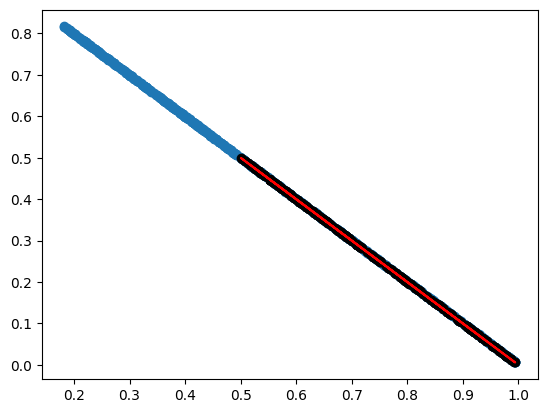

621 f(x) =  [-1.00000118] *x + 1.0000007335470227
622 f(x) =  [-1.00000048] *x + 1.0000002281685498
623 f(x) =  [-0.99999981] *x + 0.9999997983721094
624 f(x) =  [-1.00000003] *x + 0.9999999648265794
625 f(x) =  [-1.00000057] *x + 1.0000002638706378
626 f(x) =  [-1.00000015] *x + 1.0000000493895276
627 f(x) =  [-0.99999995] *x + 0.9999999308997058
628 f(x) =  [-1.0000003] *x + 1.0000002013423892
629 f(x) =  [-1.0000005] *x + 1.0000003798039248
630 f(x) =  [-1.00000043] *x + 1.0000003368199635


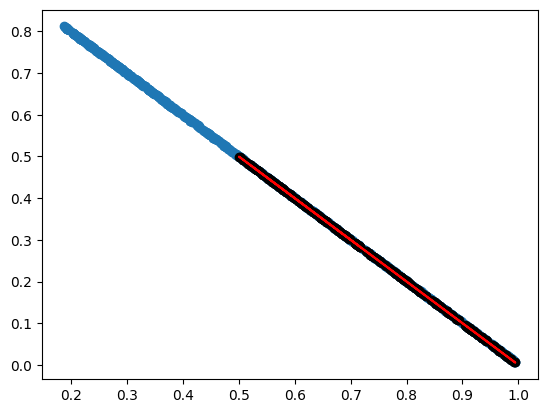

631 f(x) =  [-1.00000041] *x + 1.000000247033189
632 f(x) =  [-1.00000078] *x + 1.0000004545302341
633 f(x) =  [-1.00000104] *x + 1.0000005414978173
634 f(x) =  [-1.00000104] *x + 1.0000005414978173
635 f(x) =  [-1.00000135] *x + 1.0000007094334997
636 f(x) =  [-1.00000094] *x + 1.0000004262798579
637 f(x) =  [-1.00000043] *x + 1.000000035637536
638 f(x) =  [-1.00000016] *x + 0.999999813338589
639 f(x) =  [-0.99999977] *x + 0.9999995229175255
640 f(x) =  [-0.99999969] *x + 0.9999994964620127


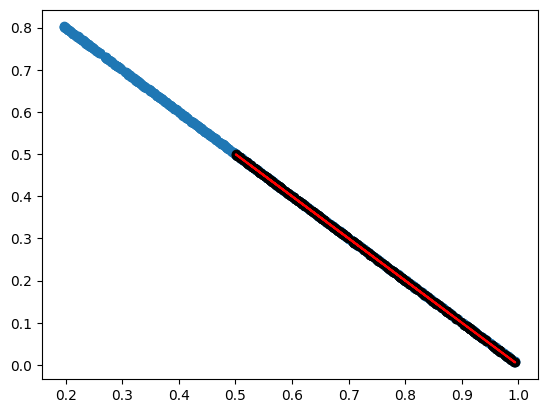

641 f(x) =  [-1.] *x + 0.9999997488250956
642 f(x) =  [-1.00000027] *x + 0.9999999569173038
643 f(x) =  [-1.00000027] *x + 0.999999925161534
644 f(x) =  [-1.0000008] *x + 1.0000004843683994
645 f(x) =  [-1.00000094] *x + 1.0000005659716065
646 f(x) =  [-1.00000078] *x + 1.000000539816514
647 f(x) =  [-1.00000074] *x + 1.0000005431667962
648 f(x) =  [-1.00000111] *x + 1.0000009535849959
649 f(x) =  [-1.00000105] *x + 1.0000009322512913
650 f(x) =  [-1.00000065] *x + 1.0000006215734205


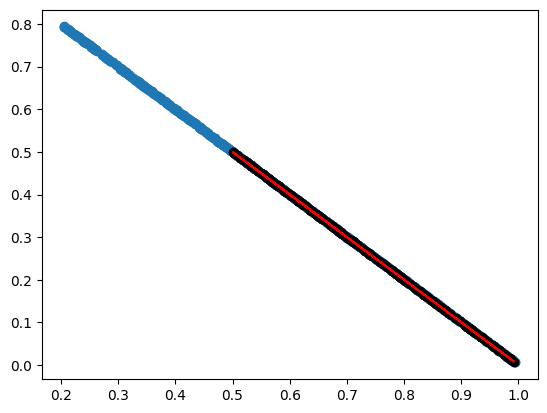

651 f(x) =  [-1.0000006] *x + 1.000000600153718
652 f(x) =  [-1.00000043] *x + 1.0000004425478823
653 f(x) =  [-1.0000005] *x + 1.0000004148179011
654 f(x) =  [-1.00000072] *x + 1.0000005936978031
655 f(x) =  [-1.00000078] *x + 1.0000006608923382
656 f(x) =  [-1.00000122] *x + 1.0000010153101595
657 f(x) =  [-1.00000122] *x + 1.000000962275913
658 f(x) =  [-1.00000136] *x + 1.000001088276419
659 f(x) =  [-1.00000155] *x + 1.0000011864319323
660 f(x) =  [-1.00000183] *x + 1.000001409244054


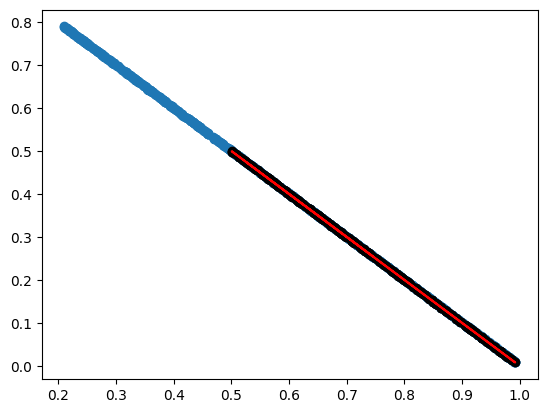

661 f(x) =  [-1.00000169] *x + 1.0000013174499958
662 f(x) =  [-1.00000192] *x + 1.0000015678267056
663 f(x) =  [-1.00000167] *x + 1.000001410162995
664 f(x) =  [-1.00000169] *x + 1.000001479731376
665 f(x) =  [-1.00000191] *x + 1.0000015939793898
666 f(x) =  [-1.00000182] *x + 1.0000015107877145
667 f(x) =  [-1.00000177] *x + 1.0000014580090761
668 f(x) =  [-1.00000174] *x + 1.0000014164409494
669 f(x) =  [-1.00000161] *x + 1.000001313146294
670 f(x) =  [-1.00000157] *x + 1.000001285151315


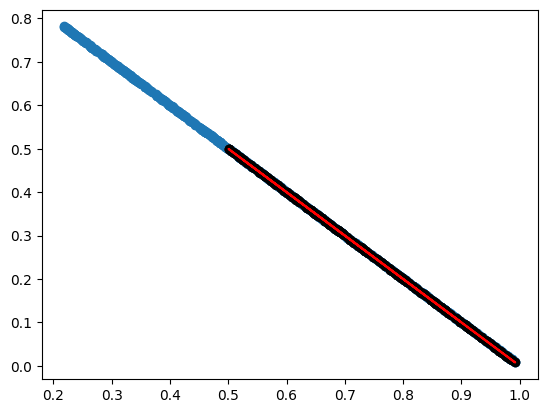

671 f(x) =  [-1.00000137] *x + 1.0000010882643076
672 f(x) =  [-1.00000051] *x + 1.0000004503341233
673 f(x) =  [-1.00000061] *x + 1.000000522385173
674 f(x) =  [-1.00000049] *x + 1.0000005176584497
675 f(x) =  [-1.00000033] *x + 1.0000004185764217
676 f(x) =  [-1.00000034] *x + 1.000000413704242
677 f(x) =  [-1.00000015] *x + 1.0000003361040406
678 f(x) =  [-1.00000016] *x + 1.000000359690547
679 f(x) =  [-1.00000047] *x + 1.0000005485842596
680 f(x) =  [-1.00000038] *x + 1.0000004746805462


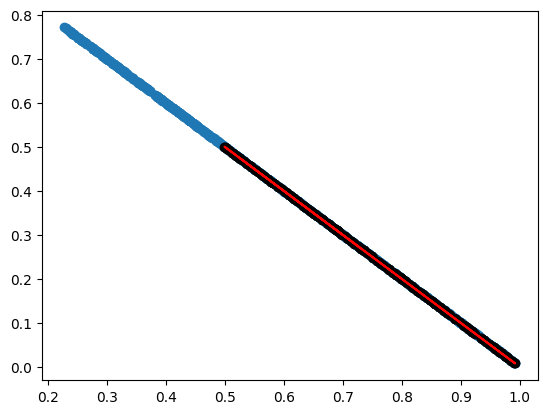

681 f(x) =  [-1.00000029] *x + 1.000000397696631
682 f(x) =  [-0.99999974] *x + 0.9999999456011951
683 f(x) =  [-0.99999986] *x + 1.0000000366050275
684 f(x) =  [-0.99999998] *x + 1.0000001510041594
685 f(x) =  [-0.99999976] *x + 0.999999947208587
686 f(x) =  [-0.99999983] *x + 1.0000000513748848
687 f(x) =  [-0.99999987] *x + 1.0000001016559867
688 f(x) =  [-0.99999978] *x + 1.0000000393618356
689 f(x) =  [-0.99999988] *x + 1.0000001055715704
690 f(x) =  [-1.00000006] *x + 1.0000002600828872


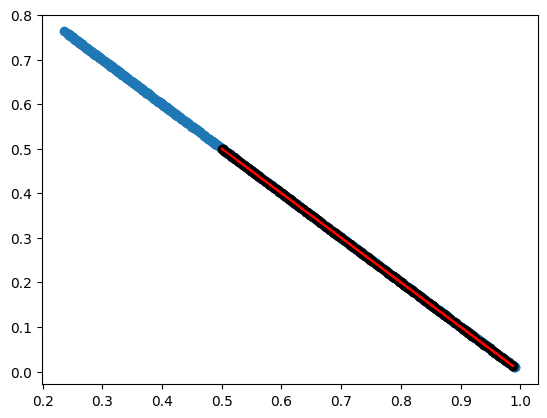

691 f(x) =  [-0.99999988] *x + 1.0000001247248642
692 f(x) =  [-0.99999988] *x + 1.0000001352340617
693 f(x) =  [-0.99999985] *x + 1.0000001061757464
694 f(x) =  [-0.99999993] *x + 1.0000001386356048
695 f(x) =  [-1.00000022] *x + 1.000000319618427
696 f(x) =  [-1.00000005] *x + 1.0000001901174378
697 f(x) =  [-1.00000014] *x + 1.0000002437253004
698 f(x) =  [-1.00000038] *x + 1.0000003881619446
699 f(x) =  [-1.00000041] *x + 1.0000003995235767
700 f(x) =  [-1.00000021] *x + 1.0000002203760034


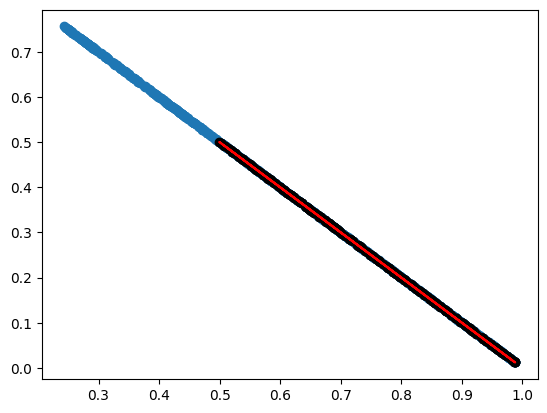

701 f(x) =  [-1.00000019] *x + 1.0000002266046448
702 f(x) =  [-0.99999993] *x + 1.0000000446041795
703 f(x) =  [-0.99999995] *x + 1.0000000466279482
704 f(x) =  [-0.99999981] *x + 0.9999999496721419
705 f(x) =  [-0.99999979] *x + 0.9999999000874724
706 f(x) =  [-0.99999981] *x + 0.9999999072750454
707 f(x) =  [-0.99999981] *x + 0.9999999072750454
708 f(x) =  [-0.99999983] *x + 0.9999999293981818
709 f(x) =  [-0.99999996] *x + 1.0000000317427158
710 f(x) =  [-1.00000015] *x + 1.0000001585092526


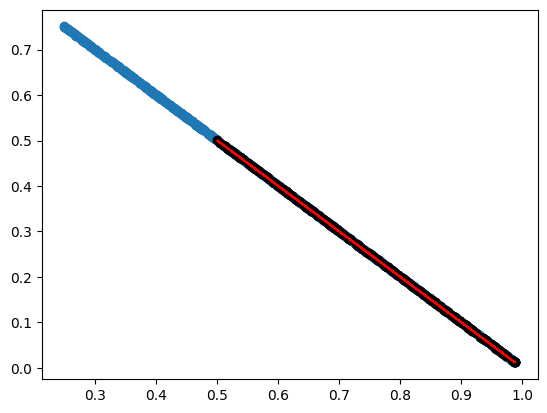

711 f(x) =  [-1.00000021] *x + 1.0000002107769244
712 f(x) =  [-1.00000023] *x + 1.0000002425159875
713 f(x) =  [-1.00000013] *x + 1.0000001836250607
714 f(x) =  [-1.00000016] *x + 1.0000002119097453
715 f(x) =  [-1.00000014] *x + 1.000000161265667
716 f(x) =  [-1.00000028] *x + 1.0000002747803771
717 f(x) =  [-1.00000035] *x + 1.0000003584975796
718 f(x) =  [-1.00000042] *x + 1.000000436381689
719 f(x) =  [-1.00000031] *x + 1.0000003318040154
720 f(x) =  [-1.00000041] *x + 1.000000390654089


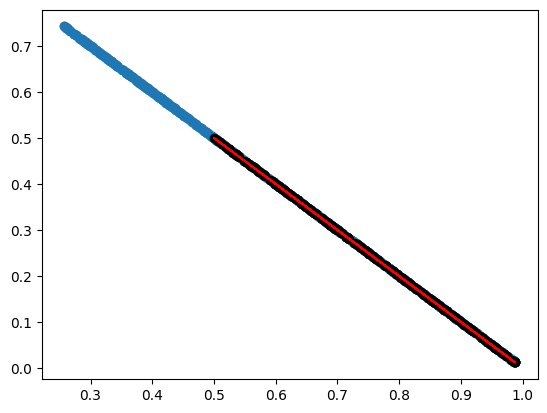

721 f(x) =  [-1.00000027] *x + 1.0000002655401676
722 f(x) =  [-1.00000024] *x + 1.0000002511985142
723 f(x) =  [-1.00000018] *x + 1.0000002020442924
724 f(x) =  [-1.00000006] *x + 1.0000001217364451
725 f(x) =  [-1.00000004] *x + 1.0000001120750066
726 f(x) =  [-1.00000013] *x + 1.000000163323195
727 f(x) =  [-1.00000001] *x + 1.0000000684028074
728 f(x) =  [-0.99999995] *x + 1.0000000379759597
729 f(x) =  [-0.99999998] *x + 1.0000000513231138
730 f(x) =  [-0.99999987] *x + 0.9999999501992811


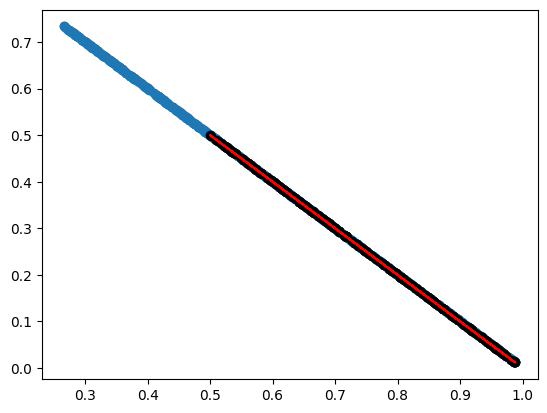

731 f(x) =  [-0.99999983] *x + 0.9999999340031378
732 f(x) =  [-0.99999979] *x + 0.9999999090103467
733 f(x) =  [-0.99999976] *x + 0.9999998933959536
734 f(x) =  [-0.99999976] *x + 0.9999998933959536
735 f(x) =  [-0.99999971] *x + 0.999999851998168
736 f(x) =  [-0.99999962] *x + 0.9999997512784349
737 f(x) =  [-0.99999975] *x + 0.9999998391367348
738 f(x) =  [-0.9999996] *x + 0.9999997244473943
739 f(x) =  [-0.9999996] *x + 0.9999997350185852
740 f(x) =  [-0.99999965] *x + 0.9999997589838828


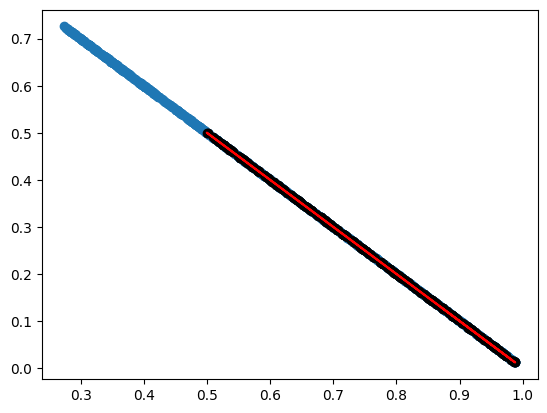

741 f(x) =  [-0.99999969] *x + 0.9999997912556842
742 f(x) =  [-0.99999968] *x + 0.9999997774829585
743 f(x) =  [-0.99999971] *x + 0.9999997950215074
744 f(x) =  [-0.99999979] *x + 0.9999998433398993
745 f(x) =  [-0.99999986] *x + 0.9999999014643984
746 f(x) =  [-0.99999987] *x + 0.999999895908972
747 f(x) =  [-0.99999989] *x + 0.9999999122819923
748 f(x) =  [-0.99999997] *x + 0.9999999764683093
749 f(x) =  [-1.00000009] *x + 1.0000000626744072
750 f(x) =  [-1.00000012] *x + 1.0000000722169815


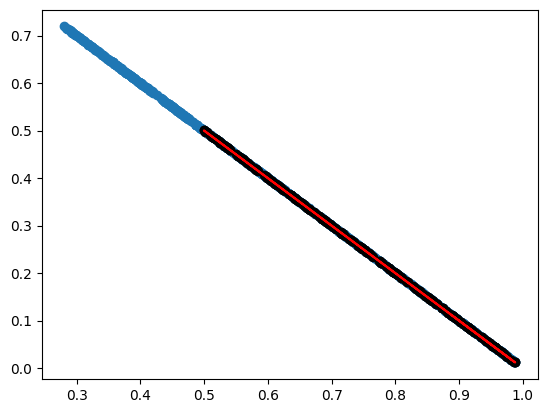

751 f(x) =  [-1.00000012] *x + 1.0000000922455907
752 f(x) =  [-1.00000016] *x + 1.0000001094082354
753 f(x) =  [-1.00000011] *x + 1.0000000754755745
754 f(x) =  [-1.00000018] *x + 1.0000001250142865
755 f(x) =  [-1.00000024] *x + 1.0000001588396799
756 f(x) =  [-1.0000003] *x + 1.0000001887257364
757 f(x) =  [-1.00000031] *x + 1.000000194638938
758 f(x) =  [-1.00000014] *x + 1.0000000697678786
759 f(x) =  [-1.00000007] *x + 1.000000013911925
760 f(x) =  [-1.00000029] *x + 1.0000001758378714


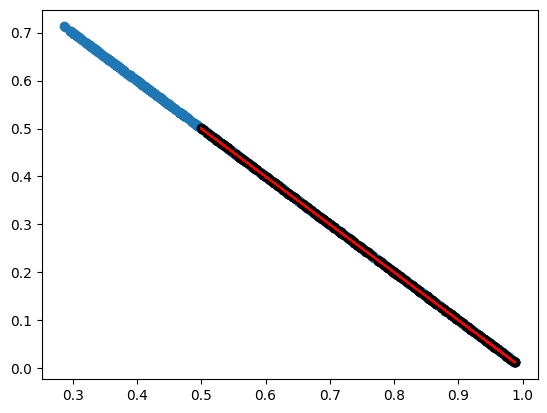

761 f(x) =  [-1.00000025] *x + 1.0000001501896618
762 f(x) =  [-1.0000002] *x + 1.0000001068908873
763 f(x) =  [-1.00000022] *x + 1.0000001334363793
764 f(x) =  [-1.00000023] *x + 1.0000001415327544
765 f(x) =  [-1.00000012] *x + 1.000000050935928
766 f(x) =  [-1.00000021] *x + 1.0000001111488375
767 f(x) =  [-1.00000017] *x + 1.0000000858053517
768 f(x) =  [-1.00000023] *x + 1.0000001320713066
769 f(x) =  [-1.0000003] *x + 1.0000001949782351
770 f(x) =  [-1.00000031] *x + 1.0000001987013785


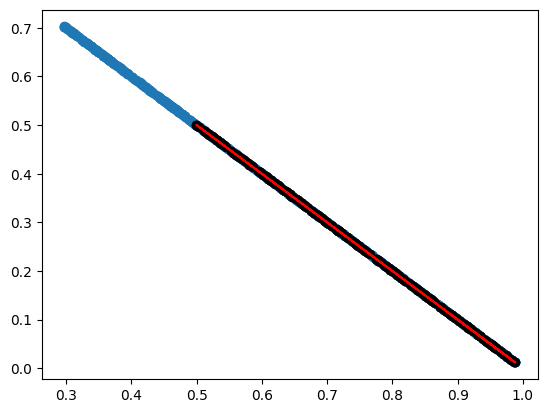

771 f(x) =  [-1.00000036] *x + 1.0000002482480648
772 f(x) =  [-1.00000038] *x + 1.0000002687757803
773 f(x) =  [-1.00000032] *x + 1.0000002309025338
774 f(x) =  [-1.00000025] *x + 1.0000001912818206
775 f(x) =  [-1.00000026] *x + 1.0000002035870863
776 f(x) =  [-1.00000013] *x + 1.0000000995916627
777 f(x) =  [-1.00000002] *x + 1.0000000188219367
778 f(x) =  [-1.] *x + 0.999999992011598
779 f(x) =  [-1.00000006] *x + 1.000000034256761
780 f(x) =  [-0.99999997] *x + 0.9999999504287271


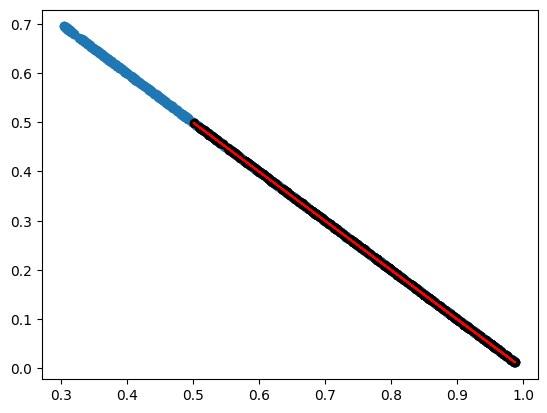

781 f(x) =  [-0.99999991] *x + 0.999999908032946
782 f(x) =  [-0.99999997] *x + 0.9999999473890047
783 f(x) =  [-0.99999988] *x + 0.9999998811865409
784 f(x) =  [-0.99999986] *x + 0.9999998793396498
785 f(x) =  [-0.99999983] *x + 0.9999998580538088
786 f(x) =  [-0.99999987] *x + 0.9999998876041449
787 f(x) =  [-0.99999987] *x + 0.9999998776130667
788 f(x) =  [-0.99999985] *x + 0.9999998638860466
789 f(x) =  [-0.99999993] *x + 0.9999999260502801
790 f(x) =  [-1.00000005] *x + 1.0000000299070575


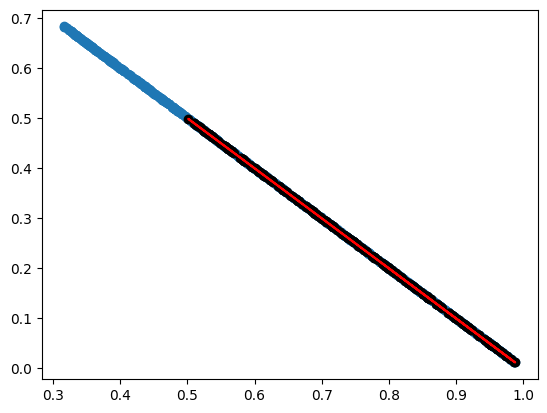

791 f(x) =  [-1.00000013] *x + 1.0000000901402515
792 f(x) =  [-1.00000008] *x + 1.0000000472334225
793 f(x) =  [-1.00000019] *x + 1.0000001390635482
794 f(x) =  [-1.0000002] *x + 1.0000001403554766
795 f(x) =  [-1.00000017] *x + 1.0000001249152763
796 f(x) =  [-1.00000015] *x + 1.0000001043991857
797 f(x) =  [-1.00000013] *x + 1.0000001002980632
798 f(x) =  [-1.00000022] *x + 1.0000001716336768
799 f(x) =  [-1.00000014] *x + 1.0000001207396303
800 f(x) =  [-1.00000025] *x + 1.0000001978063016


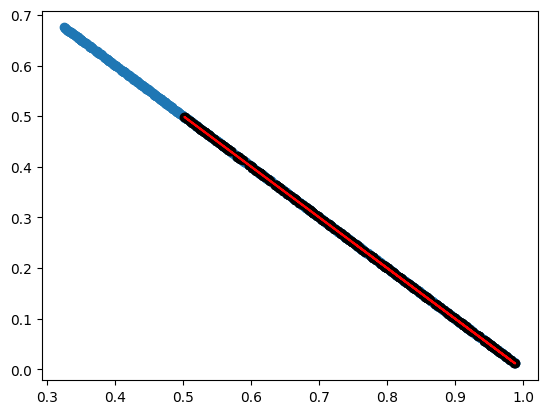

801 f(x) =  [-1.00000031] *x + 1.0000002475407284
802 f(x) =  [-1.00000034] *x + 1.0000002902517746
803 f(x) =  [-1.00000034] *x + 1.0000002798283383
804 f(x) =  [-1.00000033] *x + 1.0000002608909921
805 f(x) =  [-1.00000029] *x + 1.0000002319223968
806 f(x) =  [-1.00000028] *x + 1.0000002109673596
807 f(x) =  [-1.00000026] *x + 1.0000001940546872
808 f(x) =  [-1.00000023] *x + 1.000000174728271
809 f(x) =  [-1.00000028] *x + 1.0000002170645124
810 f(x) =  [-1.00000027] *x + 1.0000002057665334


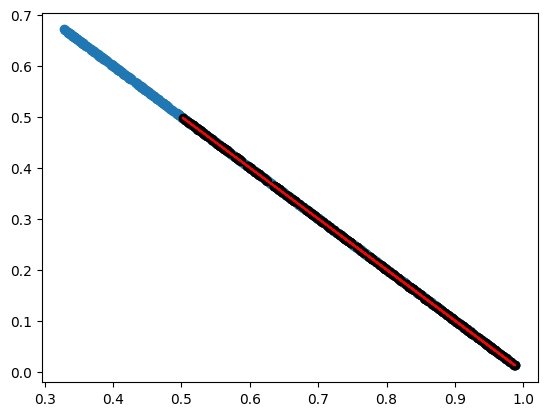

811 f(x) =  [-1.00000028] *x + 1.0000002092238525
812 f(x) =  [-1.00000025] *x + 1.000000185936336
813 f(x) =  [-1.00000028] *x + 1.0000002127259373
814 f(x) =  [-1.00000025] *x + 1.000000172026949
815 f(x) =  [-1.0000002] *x + 1.0000001419894744
816 f(x) =  [-1.00000011] *x + 1.0000000726383633
817 f(x) =  [-1.0000001] *x + 1.0000000590948226
818 f(x) =  [-1.] *x + 0.9999999863826526
819 f(x) =  [-0.99999997] *x + 0.9999999614593207
820 f(x) =  [-1.00000001] *x + 0.999999994180095


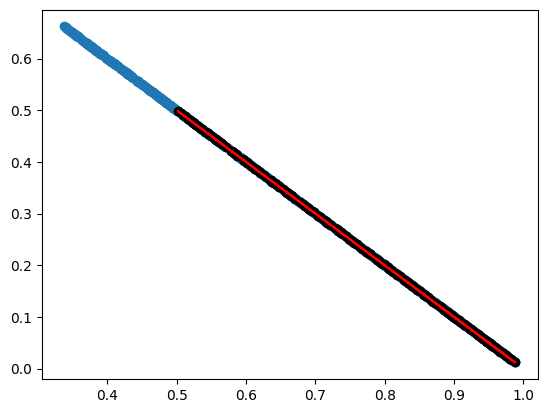

821 f(x) =  [-1.00000006] *x + 1.0000000285023445
822 f(x) =  [-1.0000001] *x + 1.0000000449216009
823 f(x) =  [-1.00000009] *x + 1.0000000530367006
824 f(x) =  [-1.00000012] *x + 1.0000000766137367
825 f(x) =  [-1.00000009] *x + 1.0000000641225677
826 f(x) =  [-1.00000004] *x + 1.0000000160891638
827 f(x) =  [-1.00000009] *x + 1.000000060800715
828 f(x) =  [-1.0000001] *x + 1.0000000599970473
829 f(x) =  [-1.00000011] *x + 1.0000000706791758
830 f(x) =  [-1.00000008] *x + 1.0000000416506094


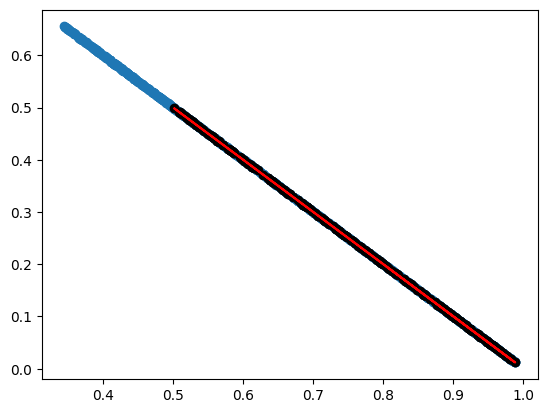

831 f(x) =  [-1.00000004] *x + 1.0000000149649138
832 f(x) =  [-1.00000003] *x + 1.0000000062117802
833 f(x) =  [-0.99999995] *x + 0.9999999297183155
834 f(x) =  [-0.99999997] *x + 0.9999999424060053
835 f(x) =  [-0.99999996] *x + 0.9999999407246434
836 f(x) =  [-1.00000001] *x + 0.9999999900179393
837 f(x) =  [-0.99999998] *x + 0.9999999675989499
838 f(x) =  [-0.99999995] *x + 0.9999999408117028
839 f(x) =  [-0.99999995] *x + 0.9999999512594415
840 f(x) =  [-0.99999991] *x + 0.9999999185153059


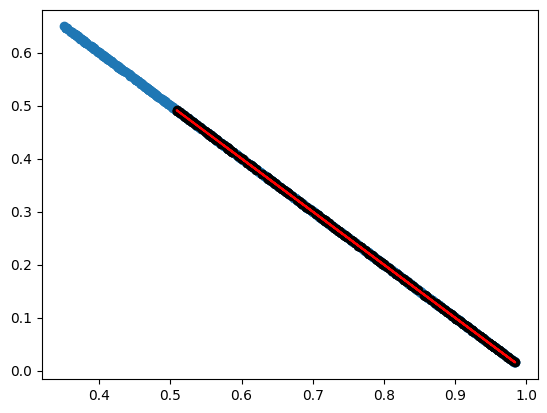

841 f(x) =  [-0.99999982] *x + 0.9999998610308258
842 f(x) =  [-0.99999989] *x + 0.9999999034085906
843 f(x) =  [-0.99999991] *x + 0.9999999130358161
844 f(x) =  [-0.99999991] *x + 0.9999999130358161
845 f(x) =  [-0.99999983] *x + 0.9999998462497159
846 f(x) =  [-0.99999981] *x + 0.9999998326950417
847 f(x) =  [-0.99999982] *x + 0.9999998432425246
848 f(x) =  [-0.99999981] *x + 0.9999998354193377
849 f(x) =  [-0.99999978] *x + 0.9999998245818644
850 f(x) =  [-0.9999998] *x + 0.9999998301393944


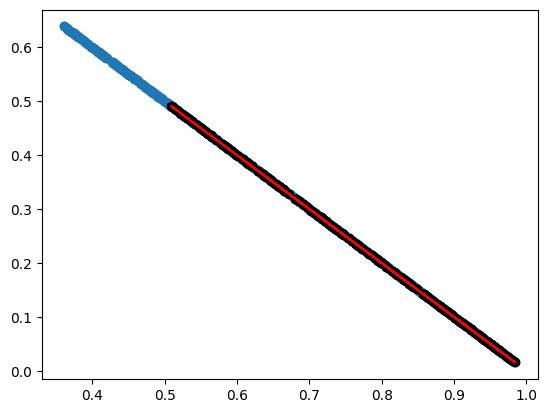

851 f(x) =  [-0.99999983] *x + 0.9999998622900507
852 f(x) =  [-0.99999986] *x + 0.9999998866098163
853 f(x) =  [-0.99999986] *x + 0.9999998866098163
854 f(x) =  [-0.99999986] *x + 0.9999998879164415
855 f(x) =  [-0.99999988] *x + 0.9999999009326916
856 f(x) =  [-0.99999989] *x + 0.9999999088664284
857 f(x) =  [-0.99999988] *x + 0.9999999002245672
858 f(x) =  [-0.99999986] *x + 0.999999884663172
859 f(x) =  [-0.99999987] *x + 0.999999902168262
860 f(x) =  [-0.99999987] *x + 0.9999998956896882


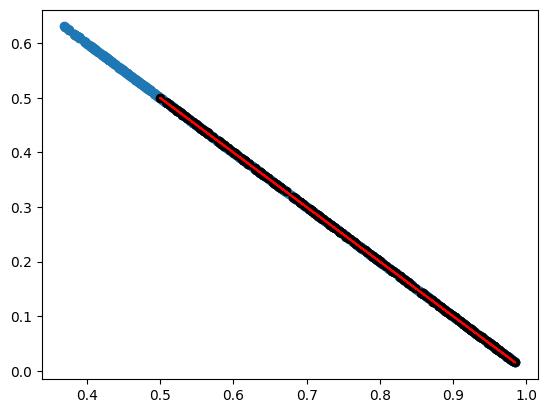

861 f(x) =  [-0.99999986] *x + 0.9999998950276332
862 f(x) =  [-0.99999985] *x + 0.9999998945627988
863 f(x) =  [-0.99999989] *x + 0.999999918605838
864 f(x) =  [-0.99999985] *x + 0.9999998926209944
865 f(x) =  [-0.99999988] *x + 0.9999999080775216
866 f(x) =  [-0.99999991] *x + 0.9999999283207905
867 f(x) =  [-0.99999991] *x + 0.9999999272358341
868 f(x) =  [-0.99999993] *x + 0.999999950079852
869 f(x) =  [-0.99999993] *x + 0.9999999531471885
870 f(x) =  [-0.99999992] *x + 0.9999999467464559


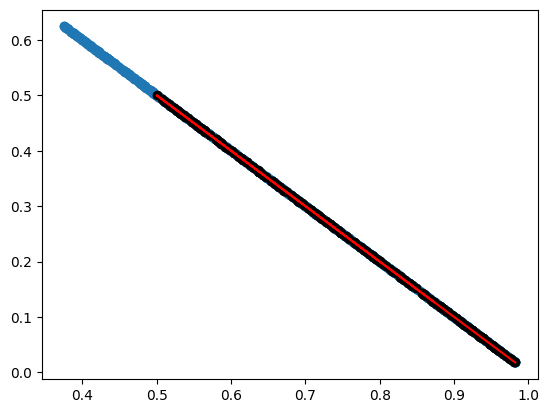

871 f(x) =  [-0.99999994] *x + 0.9999999577472964
872 f(x) =  [-0.99999995] *x + 0.9999999674224261
873 f(x) =  [-0.99999996] *x + 0.9999999776346795
874 f(x) =  [-0.99999996] *x + 0.9999999702914233
875 f(x) =  [-0.99999995] *x + 0.9999999667479761
876 f(x) =  [-0.99999995] *x + 0.9999999620193137
877 f(x) =  [-1.] *x + 0.9999999979196981
878 f(x) =  [-0.99999999] *x + 0.9999999976652592
879 f(x) =  [-1.00000001] *x + 1.0000000141591476
880 f(x) =  [-1.00000004] *x + 1.0000000310760455


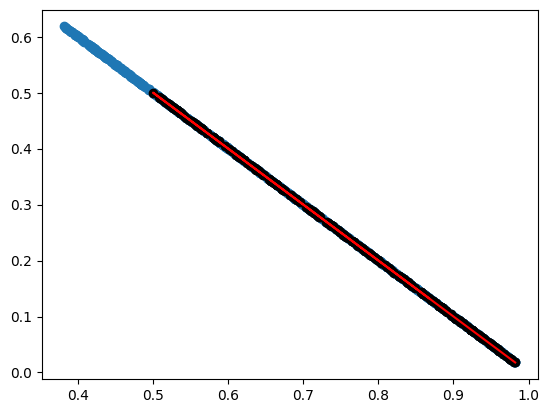

881 f(x) =  [-1.00000001] *x + 1.000000010378483
882 f(x) =  [-1.] *x + 1.0000000086876364
883 f(x) =  [-1.] *x + 1.000000004022647
884 f(x) =  [-0.99999998] *x + 0.9999999926765955
885 f(x) =  [-1.] *x + 1.0000000089576226
886 f(x) =  [-0.99999998] *x + 0.9999999894235192
887 f(x) =  [-0.99999996] *x + 0.9999999732488394
888 f(x) =  [-0.99999997] *x + 0.9999999801062641
889 f(x) =  [-0.99999999] *x + 0.9999999934516406
890 f(x) =  [-1.00000001] *x + 1.0000000145206405


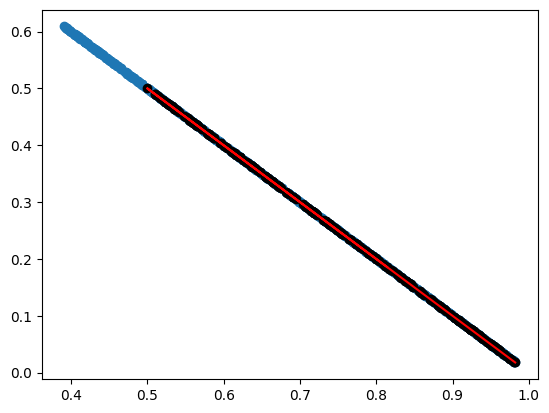

891 f(x) =  [-1.00000002] *x + 1.0000000124650463
892 f(x) =  [-1.00000002] *x + 1.0000000105038132
893 f(x) =  [-0.99999999] *x + 0.9999999927828878
894 f(x) =  [-0.99999997] *x + 0.999999977959174
895 f(x) =  [-0.99999997] *x + 0.999999979301061
896 f(x) =  [-0.99999998] *x + 0.9999999895100087
897 f(x) =  [-0.99999995] *x + 0.9999999664678716
898 f(x) =  [-0.99999995] *x + 0.9999999608859071
899 f(x) =  [-0.99999995] *x + 0.9999999641249206
900 f(x) =  [-0.99999997] *x + 0.9999999717692571


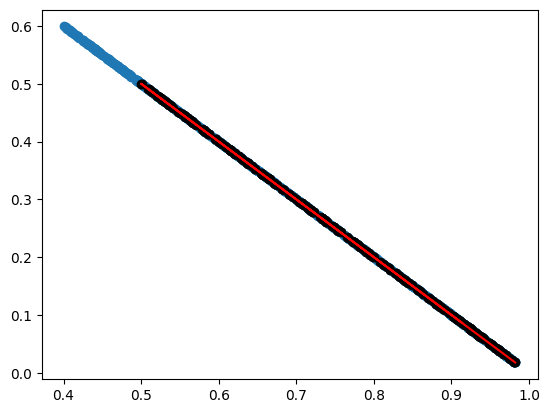

901 f(x) =  [-0.99999996] *x + 0.9999999641846631
902 f(x) =  [-0.99999997] *x + 0.9999999708396998
903 f(x) =  [-0.99999997] *x + 0.9999999726780338
904 f(x) =  [-0.99999997] *x + 0.9999999726780338
905 f(x) =  [-0.99999996] *x + 0.9999999686041828
906 f(x) =  [-0.99999997] *x + 0.999999974386945
907 f(x) =  [-1.] *x + 1.0000000005225769
908 f(x) =  [-1.00000004] *x + 1.0000000239216458
909 f(x) =  [-1.00000003] *x + 1.0000000176232564
910 f(x) =  [-1.00000005] *x + 1.0000000356377736


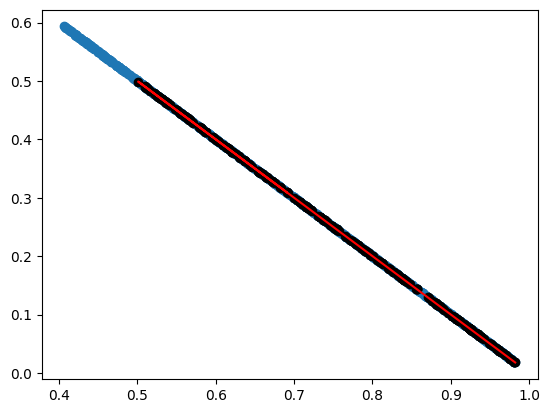

911 f(x) =  [-1.00000007] *x + 1.0000000484548464
912 f(x) =  [-1.00000008] *x + 1.0000000572524048
913 f(x) =  [-1.00000006] *x + 1.0000000432069445
914 f(x) =  [-1.00000005] *x + 1.0000000380787593
915 f(x) =  [-1.00000006] *x + 1.0000000433865306
916 f(x) =  [-1.00000007] *x + 1.0000000505126285
917 f(x) =  [-1.00000006] *x + 1.0000000465158467
918 f(x) =  [-1.00000005] *x + 1.0000000355207637
919 f(x) =  [-1.00000004] *x + 1.0000000285612254
920 f(x) =  [-1.00000005] *x + 1.0000000342000577


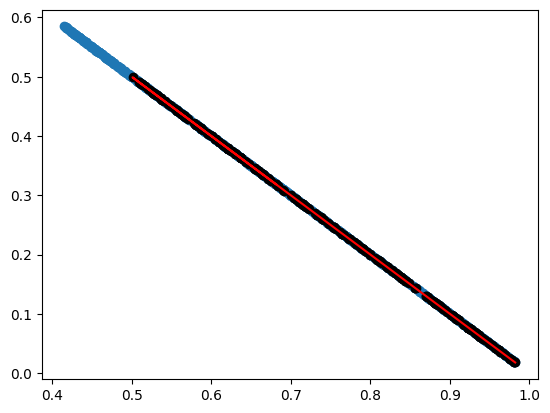

921 f(x) =  [-1.00000006] *x + 1.000000043354841
922 f(x) =  [-1.00000007] *x + 1.0000000487518599
923 f(x) =  [-1.00000007] *x + 1.0000000499373138
924 f(x) =  [-1.00000008] *x + 1.000000054473271
925 f(x) =  [-1.00000007] *x + 1.0000000496811179
926 f(x) =  [-1.00000009] *x + 1.000000070604921
927 f(x) =  [-1.00000008] *x + 1.0000000567642688
928 f(x) =  [-1.00000007] *x + 1.0000000456976506
929 f(x) =  [-1.00000007] *x + 1.0000000463839467
930 f(x) =  [-1.00000007] *x + 1.00000004838946


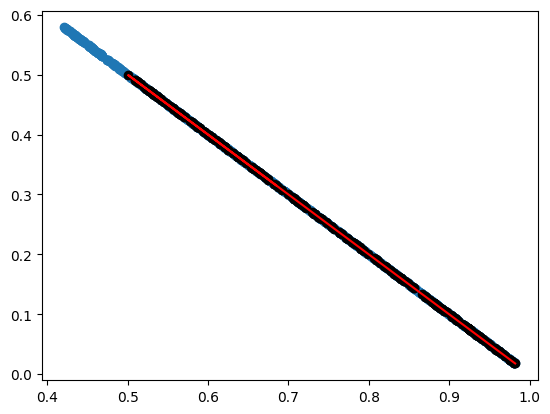

931 f(x) =  [-1.00000007] *x + 1.0000000545012977
932 f(x) =  [-1.00000009] *x + 1.0000000656961114
933 f(x) =  [-1.0000001] *x + 1.0000000743010915
934 f(x) =  [-1.00000009] *x + 1.0000000677816294
935 f(x) =  [-1.00000007] *x + 1.0000000537554325
936 f(x) =  [-1.00000008] *x + 1.0000000561451963
937 f(x) =  [-1.00000007] *x + 1.000000049634824
938 f(x) =  [-1.00000006] *x + 1.000000048401274
939 f(x) =  [-1.00000006] *x + 1.0000000442885093
940 f(x) =  [-1.00000005] *x + 1.0000000401868236


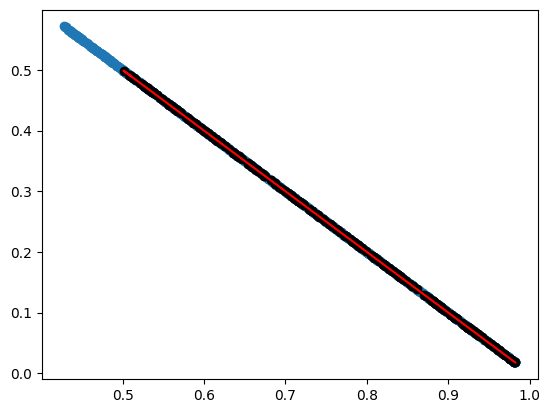

941 f(x) =  [-1.00000006] *x + 1.0000000454038733
942 f(x) =  [-1.00000005] *x + 1.0000000354813228
943 f(x) =  [-1.00000005] *x + 1.0000000381075544
944 f(x) =  [-1.00000002] *x + 1.0000000177973927
945 f(x) =  [-1.00000002] *x + 1.000000017561432
946 f(x) =  [-1.00000003] *x + 1.000000027116667
947 f(x) =  [-1.00000006] *x + 1.0000000499359039
948 f(x) =  [-1.00000006] *x + 1.00000005163596
949 f(x) =  [-1.00000006] *x + 1.0000000504845497
950 f(x) =  [-1.00000005] *x + 1.0000000424760926


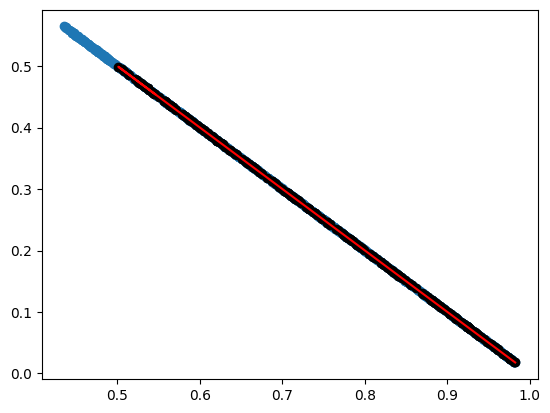

951 f(x) =  [-1.00000005] *x + 1.000000043682074
952 f(x) =  [-1.00000003] *x + 1.0000000271546579
953 f(x) =  [-1.00000004] *x + 1.0000000334189507
954 f(x) =  [-1.00000005] *x + 1.0000000371011086
955 f(x) =  [-1.00000005] *x + 1.0000000358503998
956 f(x) =  [-1.00000004] *x + 1.000000034418719
957 f(x) =  [-1.00000004] *x + 1.0000000299541463
958 f(x) =  [-1.00000003] *x + 1.0000000242289762
959 f(x) =  [-1.00000001] *x + 1.0000000080564535
960 f(x) =  [-1.00000001] *x + 1.0000000079023013


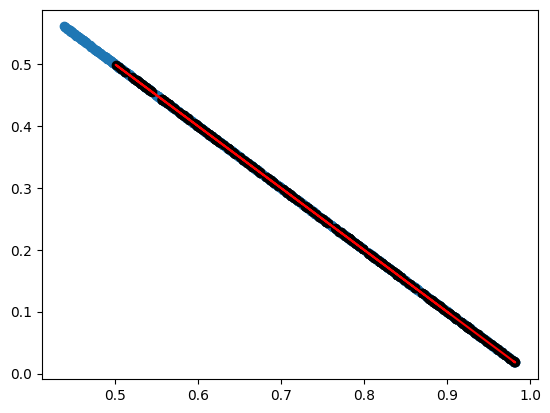

961 f(x) =  [-1.00000001] *x + 1.0000000066675625
962 f(x) =  [-1.00000001] *x + 1.0000000017971664
963 f(x) =  [-1.00000002] *x + 1.0000000069338397
964 f(x) =  [-1.00000002] *x + 1.0000000121763377
965 f(x) =  [-1.00000002] *x + 1.0000000086643728
966 f(x) =  [-1.] *x + 0.9999999969829817
967 f(x) =  [-1.] *x + 0.9999999951514469
968 f(x) =  [-1.] *x + 0.999999991575483
969 f(x) =  [-0.99999999] *x + 0.9999999902015789
970 f(x) =  [-1.] *x + 0.9999999922119298


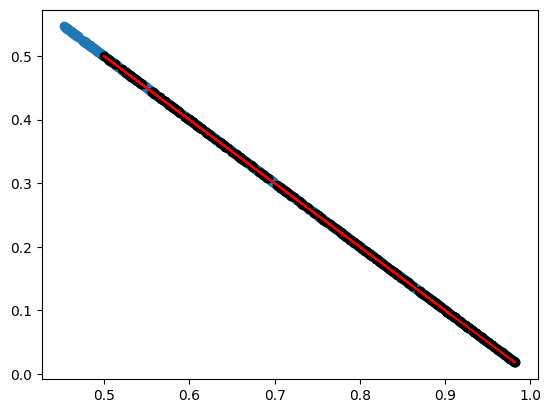

971 f(x) =  [-0.99999999] *x + 0.9999999881409191
972 f(x) =  [-1.00000001] *x + 0.999999999656614
973 f(x) =  [-1.00000001] *x + 1.000000001303449
974 f(x) =  [-1.00000001] *x + 1.0000000053962097
975 f(x) =  [-1.00000001] *x + 1.0000000052650142
976 f(x) =  [-1.00000001] *x + 1.000000001153047
977 f(x) =  [-1.00000001] *x + 1.0000000052712725
978 f(x) =  [-1.00000002] *x + 1.0000000106243847
979 f(x) =  [-1.00000002] *x + 1.0000000134314757
980 f(x) =  [-1.00000002] *x + 1.0000000124363813


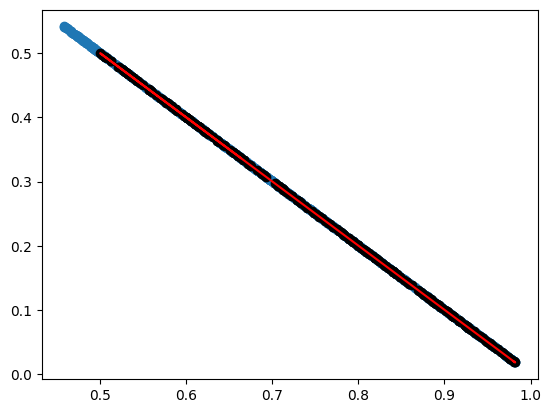

981 f(x) =  [-1.00000002] *x + 1.000000014887815
982 f(x) =  [-1.00000001] *x + 1.0000000094241166
983 f(x) =  [-1.00000002] *x + 1.0000000146387698
984 f(x) =  [-1.00000003] *x + 1.0000000161701028
985 f(x) =  [-1.00000003] *x + 1.0000000197538355
986 f(x) =  [-1.00000003] *x + 1.0000000197200007
987 f(x) =  [-1.00000003] *x + 1.000000017163842
988 f(x) =  [-1.00000002] *x + 1.0000000147136612
989 f(x) =  [-1.00000002] *x + 1.0000000152175943
990 f(x) =  [-1.00000003] *x + 1.000000019248505


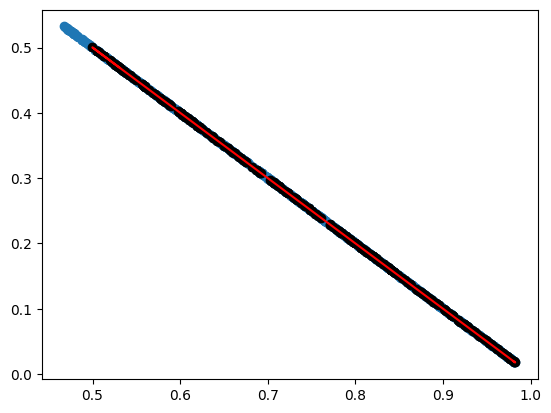

991 f(x) =  [-1.00000004] *x + 1.000000031584726
992 f(x) =  [-1.00000004] *x + 1.000000032414193
993 f(x) =  [-1.00000004] *x + 1.0000000327655225
994 f(x) =  [-1.00000004] *x + 1.0000000327655225
995 f(x) =  [-1.00000005] *x + 1.0000000329300978
996 f(x) =  [-1.00000005] *x + 1.000000032690005
997 f(x) =  [-1.00000005] *x + 1.0000000389960149
998 f(x) =  [-1.00000004] *x + 1.0000000312262425
999 f(x) =  [-1.00000003] *x + 1.0000000206561304
1000 f(x) =  [-1.00000002] *x + 1.0000000146276318


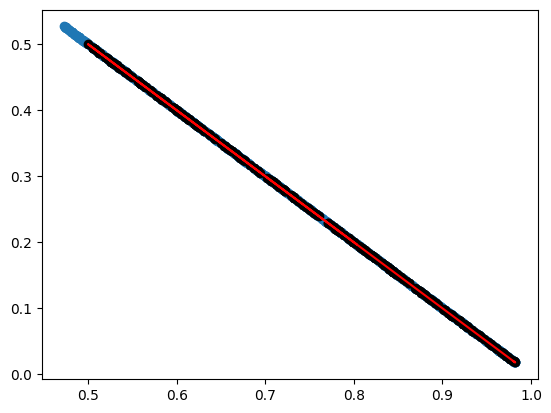

[0.98045318 0.98215861 0.80530841 0.57970508 0.87433036 0.78276403
 0.73271721 0.9664382  0.78145636 0.51950295 0.77743035 0.78072238
 0.95523589 0.74071639 0.8529165  0.61036059 0.83440244 0.75717889
 0.8350202  0.9107595  0.78903875 0.71171102 0.65385584 0.56930233
 0.52665358 0.85592246 0.52853245 0.52076199 0.78386737 0.8407406
 0.61963394 0.95740247 0.84337478 0.71598895 0.65420114 0.9409789
 0.77917658 0.52196516 0.84857049 0.8513835  0.55616118 0.96191368
 0.70715476 0.73746771 0.92373198 0.53160568 0.80850971 0.74640731
 0.82390274 0.9091282  0.82283397 0.8403104  0.70721919 0.66202919
 0.60170119 0.70662444 0.81453275 0.75433105 0.87633349 0.52786698
 0.65939906 0.81941655 0.66642888 0.84455372 0.92452326 0.67187009
 0.88118546 0.721228   0.73265079 0.53386907 0.59913421 0.87223023
 0.52512784 0.84009571 0.58670079 0.91970308 0.65976487 0.89165283
 0.62111958 0.62013256 0.54598694 0.5261459  0.90874428 0.92859963
 0.50754826 0.79364231 0.59896673 0.59466259 0.61437289 0.558985

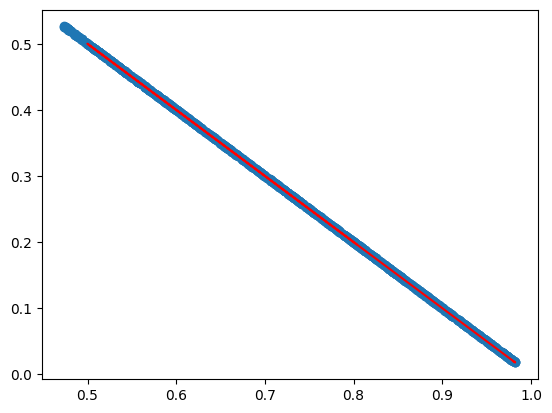

In [ ]:
 #initializing all of the points
from ctypes import set_errno

num = 1

#https://docs.python.org/3/library/random.html

setX = np.random.uniform(low=0.0, high=1.0, size = 1000)
setY = np.random.uniform(low=0.0, high=1.0, size = 1000)
#set all of the points at once

#print(setX)
#print(setY)

setXYP[:,0] = setX
setXYP[:,1] = setY

#print(setXYP)

#https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/
lowXpoint = np.min(setXYP[:,0])
highXpoint = np.max(setXYP[:,1])

#running through the algorithm

for k in range (0, 1000):
#set as iteration instead
  #https://blog.finxter.com/how-to-apply-a-function-to-each-element-of-a-list/#:~:text=The%20best%20way%20to%20apply,is%20to%20use%20list%20comprehension.

  func = map(pen, setXYP[:,0], setXYP[:,1])

  setXYP[:,2] = np.fromiter(func,dtype=float)#,dtype=float
  setXYP = setXYP[setXYP[:,2].argsort()] #https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column
  #https://thispointer.com/sorting-2d-numpy-array-by-column-or-row-in-python/

#inputs the best values into an array of 100 for the best points

  newX = setXYP[:299,0]
  newY = setXYP[:299,1]

  newX = newX.reshape(-1,1)

#this selected the numbers of the different points that were the 100 best


#linear regression and graphing

#https://www.w3schools.com/python/python_ml_linear_regression.asp
#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
#https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
#https://www.statology.org/numpy-get-row/

  linReg.fit(newX, newY)
  print(num, 'f(x) = ', linReg.coef_,'*x +', linReg.intercept_)

  m = linReg.coef_
  yInt = linReg.intercept_

  def regLine(xVal): #returns the y value of any x coordinate on the line
    return m * xVal + yInt

  line = list(map(regLine, newX))

  if num % 10 == 0:
    plt.scatter(setXYP[:,0], setXYP[:,1])
    plt.scatter(newX, newY, color = 'k')
    plt.plot(newX, line, color='r')

  plt.show()

  minXBound = minSearch(lowXpoint)
  maxXBound = maxSearch(highXpoint)


  setXYP[300:1000,0] = np.random.uniform(low = minXBound, high = maxXBound, size = 700)


#find regression point first! then use that in the bounds

  yreg = map(regLine, setXYP[300:1000,0])
  yReg = np.fromiter(yreg,dtype=float)

  min_y = map(minSearch, yReg)
  minY = np.fromiter(min_y,dtype=float)

  max_y = map(maxYSearch, yReg)
  maxY = np.fromiter(max_y,dtype=float)

  newY = map(randomY, minY, maxY)
  setXYP[300:1000,1] = np.fromiter(newY,dtype=float)

#https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/
  lowXpoint = np.min(setXYP[:,0])
  highXpoint = np.max(setXYP[:,0])
  num += 1

#prints the entirety of points at the end of all iterations

print(setXYP[:,0], setXYP[:,1])

plt.scatter(setXYP[:,0], setXYP[:,1])
plt.plot(newX, line, color='r')

plt.show()
